# Pre-processing DLC C9orf72 OFT outputs

In [1]:
#use analysis environment
#mamba activate analysis
#select interpreter: C:\Users\nj35\AppData\Local\miniforge3\envs\analysis\python.exe

In [2]:
%pwd #assign working directory

'c:\\Users\\User\\OneDrive - University of St Andrews\\Desktop\\DLC directory'

In [3]:
#Install necessary packages, % allows package installation in Jupyter notebook
%pip install numpy
%pip install pandas 
%pip install matplotlib
%pip install seaborn 
%pip install scikit-learn 
%pip install scipy
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #data array analysis
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data visualisation 
import seaborn as sns #statistical visualisation
import sklearn as sk #machine learning and statistical modelling
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats

In [5]:
#assign working direct for excel files
%cd "C:\Users\User\OneDrive - University of St Andrews\Desktop\DLC directory\Copy Raw Data DLC"

C:\Users\User\OneDrive - University of St Andrews\Desktop\DLC directory\Copy Raw Data DLC


# Testing PyRat

(https://github.com/pyratlib/pyrat)

In [6]:
%pip install pyratlib
import pyratlib as rat
from scipy import signal


Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip list

Package            Version
------------------ -------
asttokens          2.4.1
colorama           0.4.6
comm               0.2.2
contourpy          1.2.1
cycler             0.12.1
debugpy            1.8.1
decorator          5.1.1
exceptiongroup     1.2.0
executing          2.0.1
fonttools          4.51.0
importlib_metadata 7.1.0
ipykernel          6.29.3
ipython            8.22.2
jedi               0.19.1
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
neo                0.13.0
nest_asyncio       1.6.0
numpy              1.26.4
packaging          24.0
pandas             2.2.2
parso              0.8.4
pickleshare        0.7.5
pillow             10.3.0
pip                24.0
platformdirs       4.2.0
prompt-toolkit     3.0.42
psutil             5.9.8
pure-eval          0.2.2
pyarrow            15.0.2
Pygments           2.17.2
pyparsing          3.1.2
pyratlib           0.7.7
python-dateu

In [8]:
%pip show pyratlib

Name: pyratlib
Version: 0.7.7
Summary: PyRat is a user friendly library in python to analyze data from the DeepLabCut. Developed to help researchers unfamiliar with programming can perform animal behavior analysis more simpler.
Home-page: https://github.com/pyratlib/pyrat
Author: 
Author-email: 
License: MIT
Location: c:\users\user\miniforge3\envs\analysis\lib\site-packages
Requires: neo, numpy, pandas, scikit-learn, wheel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Read pre-symptomatic data (trials 1-8)
oft_pre_1 = pd.read_csv('OFT pre-trial 1DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_2 = pd.read_csv('OFT pre-trial 2DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_3_C9 = pd.read_csv('OFT pre-trial 3DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_4_C9 = pd.read_csv('OFT pre-trial 4DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_5 = pd.read_csv('OFT pre-trial 5DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_6 = pd.read_csv('OFT pre-trial 6DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_7_C9 = pd.read_csv('OFT pre-trial 7DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')
oft_pre_8 = pd.read_csv('OFT pre-trial 8DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000_filtered.csv')

# Testing PyRat with corrected parameters for HD video
(used online pixel thing to find boundaries of video arena box)

In [10]:
oft_pre_1

scorer DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000  \
0     bodyparts                                          nose   
1        coords                                             x   
2             0                                1015.587890625   
3             1                            1017.1031494140625   
4             2                            1020.6378173828125   
...         ...                                           ...   
6020       6018                             717.0292358398438   
6021       6019                             716.9397583007812   
6022       6020                             716.2125244140625   
6023       6021                             715.0184936523438   
6024       6022                               710.24853515625   

     DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.1  \
0                                               nose   
1                                                  y   
2                                  866.0896606445312   
3                                  867.4520263671875   
4                                     871.3486328125   
...                                              ...   
6020                               265.0835266113281   
6021                               264.5460205078125   
6022                              259.93572998046875   
6023                               255.7017822265625   
6024                              251.64862060546875   

     DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.2  \
0                                               nose   
1                                         likelihood   
2                                 0.7969743609428406   
3                                 0.7331357598304749   
4                                 0.6881675124168396   
...                                              ...   
6020                               0.742992639541626   
6021                              0.7514070868492126   
6022                              0.8430317044258118   
6023                               0.810389518737793   
6024                              0.8573311567306519   

     DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.3  \
0                                        head centre   
1                                                  x   
2                                  989.5457763671875   
3                                  992.8598022460938   
4                                  997.8211669921875   
...                                              ...   
6020                                722.969970703125   
6021                               722.2814331054688   
6022                               721.2247314453125   
6023                               717.1038818359375   
6024                                 714.11962890625   

     DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.4  \
0                                        head centre   
1                                                  y   
2                                      843.705078125   
3                                    847.96240234375   
4                                  851.1031494140625   
...                                              ...   
6020                               289.2285461425781   
6021                               285.0268249511719   
6022                               281.9629821777344   
6023                               279.8316650390625   
6024                               276.1711120605469   

     DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.5  \
0                                        head centre   
1                                         likelihood   
2                                  0.700412392616272   
3                                 0.7457044720649719   
4                                 0.8020192980766296   
...                                              ...   
6020                               0.892688512802124   
6021                              0.9070424437522888   
6022                            

In [11]:
data_WT = [oft_pre_1,oft_pre_2,oft_pre_5,oft_pre_6,oft_pre_8]

In [12]:
values = (oft_pre_1.iloc[2:,1:].values).astype(float)
lista1 = (oft_pre_1.iloc[0][1:].values +" - " + oft_pre_1.iloc[1][1:].values).tolist()

dataX = values[:,lista1.index('body centre'+" - x")]
dataY = values[:,lista1.index('body centre'+" - y")]

l = rat.pixel2centimeters(dataX, 1280, 0,max_real=(1031-242)/50, min_real=0) #max_real converts arena pixels in resolution to cm (50 x 50 OFT box)
k = rat.pixel2centimeters(dataY, 920, 0,max_real=(860-86)/50, min_real=0)

In [13]:
dataX

array([973.48150635, 975.16937256, 976.02789307, ..., 731.94165039,
       729.92663574, 729.31799316])

In [14]:
l #THIS IS THE BODY PART LOCATION IN CM (x)

array([12.0012017 , 12.02200992, 12.03259387, ...,  9.02346816,
        8.99862681,  8.99112338])

In [15]:
dataY 

array([804.8081665 , 810.04052734, 811.06829834, ..., 337.27893066,
       334.93521118, 332.30743408])

In [16]:
k #THIS IS THE BODY PART LOCATION IN CM (Y)

array([13.54177219, 13.62981235, 13.64710572, ...,  5.67508462,
        5.63564899,  5.59143378])

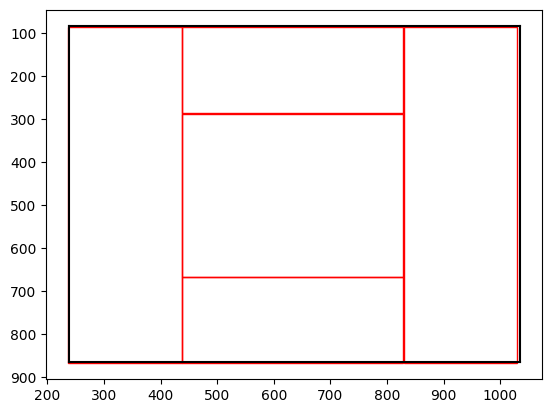

In [17]:
area_test = {'peripheryLeft': [1,0  ,0  ,0 ,237,85,200,782],
        'peripheryRight': [1,0  ,0  ,0 ,830,85,200,782],
        'peripheryTop': [1,0  ,0  ,0 ,438,86,391,200],
        'peripheryBottom': [1,0  ,0  ,0 ,438,667,391,200],
        'Centre': [1,0  ,0  ,0 ,438,287,391,379]}
obj_test = rat.FieldDetermination(posit = area_test,plot=True,data=oft_pre_1,bodyPartBox='body centre')

In [18]:
#testing reports with updated code for resolution
trial_name_test = ['OFT_pre_WT_1','OFT_pre_WT_2','OFT_pre_WT_5','OFT_pre_WT_6','OFT_pre_WT_8']
#WT_report_test = rat.Reports(data_WT,list_name = trial_name_test,bodypart='body centre',fields=obj_test, fps = 50, max_realX = (1031-242)/50, max_realY = (860-86)/50)
WT_report_test = rat.Reports(data_WT,list_name = trial_name_test,bodypart='body centre',fields=obj_test, fps = 50)
WT_report_test

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  OFT_pre_WT_1          2.007333  313.274290      2.601082      5.0   
1  OFT_pre_WT_2          2.007000  308.601935      2.562713      8.0   
2  OFT_pre_WT_5          2.007333  253.956498      2.108573      3.0   
3  OFT_pre_WT_6          2.007333  299.887919      2.489936      5.0   
4  OFT_pre_WT_8          1.996000  207.838674      1.735460      7.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         38.42     11.0         45.06      5.0         10.54      4.0   
1         44.26      7.0         35.34      8.0         15.24      7.0   
2         78.90      5.0         19.34      1.0          3.34      3.0   
3         24.92      8.0         59.80     11.0         12.82      6.0   
4         53.48      4.0         50.68      2.0          1.36      4.0   

   time_field_4  field_5  time_field_5  
0          7.72     10.0         17.98  
1         15.78     10.0          9.54  
2          5.80      8.0         12.50  
3         14.08     12.0          8.34  
4          6.34      3.0          7.56

In [19]:
#check first few rows of excel file
oft_pre_1.head()

scorer DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000  \
0  bodyparts                                          nose   
1     coords                                             x   
2          0                                1015.587890625   
3          1                            1017.1031494140625   
4          2                            1020.6378173828125   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.1  \
0                                            nose   
1                                               y   
2                               866.0896606445312   
3                               867.4520263671875   
4                                  871.3486328125   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.2  \
0                                            nose   
1                                      likelihood   
2                              0.7969743609428406   
3                              0.7331357598304749   
4                              0.6881675124168396   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.3  \
0                                     head centre   
1                                               x   
2                               989.5457763671875   
3                               992.8598022460938   
4                               997.8211669921875   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.4  \
0                                     head centre   
1                                               y   
2                                   843.705078125   
3                                 847.96240234375   
4                               851.1031494140625   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.5  \
0                                     head centre   
1                                      likelihood   
2                               0.700412392616272   
3                              0.7457044720649719   
4                              0.8020192980766296   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.6  \
0                                        left ear   
1                                               x   
2                               997.4486083984375   
3                              1002.8589477539062   
4                              1006.0571899414062   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.7  \
0                                        left ear   
1                                               y   
2                                  836.3271484375   
3                               844.5776977539062   
4                                847.451416015625   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.8  ...  \
0                                        left ear  ...   
1                                      likelihood  ...   
2                              0.3380354940891266  ...   
3                             0.39023423194885254  ...   
4                             0.35796478390693665  ...   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.44  \
0                                               tr   
1                                       likelihood   
2                               0.9570432901382446   
3                               0.9572433829307556   
4                                0.959961473941803   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.45  \
0                                               bl   
1                                                x   
2                                235.7898406982422   
3                               235.79000854492188   
4                               235.79000854492188   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.46  \
0                                               bl   
1                                                y   
2                                857.2181396484375   
3                                857.2181396484375   
4                                857.2181396484375   

  DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.47  \
0                     

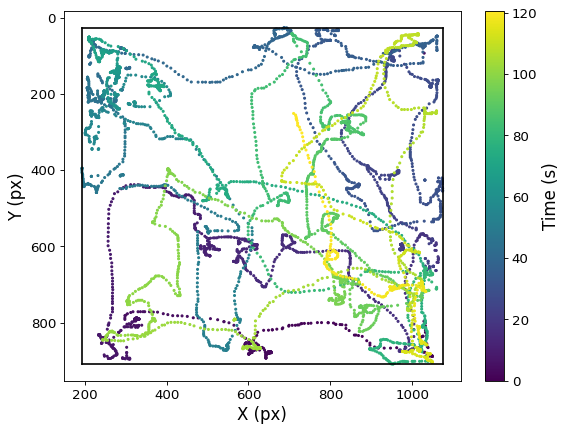

In [20]:
#plot example from trial 1
rat.Trajectory(oft_pre_1, bodyPart='nose', bodyPartBox='nose', frontsize=15, fps = 50)

In [21]:
#categorise WT and C9 dataframes in list; loop function
data_WT = [oft_pre_1,oft_pre_2,oft_pre_5,oft_pre_6,oft_pre_8]
data_C9 = [oft_pre_3_C9,oft_pre_4_C9,oft_pre_7_C9]

In [22]:
#concatenate data by group
data_WT_element = data_WT[0] #assigns value of first element in list to list-like object (data_WT_element)
data_C9_element = data_C9[0]

In [23]:
# Determine the length of the smaller list
min_length = min(len(data_WT), len(data_C9))
print(min_length)

3


In [24]:
for i in range(1,(min_length)): #loop initialisation for a range of numbers from 1 to min_length  (3). Loop starts from 1
    data_WT_concat = pd.concat([data_WT_element] + [df.iloc[2:] for df in data_WT[1:]], ignore_index=True) #concats dataframes in each list excluding first dataframe
    data_C9_concat = pd.concat([data_C9_element] + [df.iloc[2:] for df in data_C9[1:]], ignore_index=True) #exclude the first two elements (data_WT[i][2:]) of the i-th element and then assigns the result to data_WT_append. 

In [25]:
len(data_WT_concat),len(oft_pre_1) #check size of concat data and single data (WT)

(30082, 6025)

In [26]:
len(data_C9_concat),len(oft_pre_3_C9) #check size of concat data and single data (C9)

(18098, 6025)

In [27]:
data_WT_concat #check concat file

scorer DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000  \
0      bodyparts                                          nose   
1         coords                                             x   
2              0                                1015.587890625   
3              1                            1017.1031494140625   
4              2                            1020.6378173828125   
...          ...                                           ...   
30077       5984                               858.65087890625   
30078       5985                               858.65087890625   
30079       5986                             854.7224731445312   
30080       5987                             853.0599365234375   
30081       5988                             852.7901000976562   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.1  \
0                                                nose   
1                                                   y   
2                                   866.0896606445312   
3                                   867.4520263671875   
4                                      871.3486328125   
...                                               ...   
30077                              201.44842529296875   
30078                              204.68394470214844   
30079                              204.68394470214844   
30080                              204.68394470214844   
30081                              203.89468383789062   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.2  \
0                                                nose   
1                                          likelihood   
2                                  0.7969743609428406   
3                                  0.7331357598304749   
4                                  0.6881675124168396   
...                                               ...   
30077                              0.6120241284370422   
30078                              0.5823803544044495   
30079                              0.6519578099250793   
30080                               0.682661235332489   
30081                              0.6508143544197083   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.3  \
0                                         head centre   
1                                                   x   
2                                   989.5457763671875   
3                                   992.8598022460938   
4                                   997.8211669921875   
...                                               ...   
30077                               856.3016967773438   
30078                               856.3016967773438   
30079                               851.5213623046875   
30080                               849.7760009765625   
30081                               848.7645263671875   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.4  \
0                                         head centre   
1                                                   y   
2                                       843.705078125   
3                                     847.96240234375   
4                                   851.1031494140625   
...                                               ...   
30077                               223.3555145263672   
30078                              225.23306274414062   
30079                              225.91334533691406   
30080                              225.91334533691406   
30081                              225.91334533691406   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.5  \
0                                         head centre   
1                                          likelihood   
2                                   0.700412392616272   
3                                  0.7457044720649719   
4                                  0.8020192980766296   
...                                               ...   
30077                              0.8131451606750488   
30078                

In [28]:
data_C9_concat #check concat file

scorer DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000  \
0      bodyparts                                          nose   
1         coords                                             x   
2              0                                1000.322265625   
3              1                             1000.875732421875   
4              2                             1008.186767578125   
...          ...                                           ...   
18093       6046                             538.8297119140625   
18094       6047                             537.7265014648438   
18095       6048                             537.4739990234375   
18096       6049                             537.4618530273438   
18097       6050                             537.4618530273438   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.1  \
0                                                nose   
1                                                   y   
2                                  180.25294494628906   
3                                  180.25294494628906   
4                                  180.25294494628906   
...                                               ...   
18093                               467.4179992675781   
18094                               468.1639709472656   
18095                               468.1639709472656   
18096                               468.1639709472656   
18097                               468.0696105957031   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.2  \
0                                                nose   
1                                          likelihood   
2                                  0.6118828654289246   
3                                  0.6394465565681458   
4                                  0.7566163539886475   
...                                               ...   
18093                              0.9219011664390564   
18094                              0.9007605910301208   
18095                              0.8846359252929688   
18096                              0.8789395689964294   
18097                              0.8772925138473511   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.3  \
0                                         head centre   
1                                                   x   
2                                   960.1380615234375   
3                                   963.2493896484375   
4                                   969.0641479492188   
...                                               ...   
18093                               520.0369262695312   
18094                               519.1829223632812   
18095                               519.1829223632812   
18096                               519.0164794921875   
18097                               519.0164794921875   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.4  \
0                                         head centre   
1                                                   y   
2                                  178.87152099609375   
3                                   179.6903839111328   
4                                   179.6903839111328   
...                                               ...   
18093                               485.3118591308594   
18094                               485.3118591308594   
18095                               485.3118591308594   
18096                               485.2676696777344   
18097                               485.2676696777344   

      DLC_resnet50_OFT (pre-post)Apr4shuffle1_20000.5  \
0                                         head centre   
1                                          likelihood   
2                                  0.7672787308692932   
3                                  0.7956685423851013   
4                                   0.732542097568512   
...                                               ...   
18093                              0.8492334485054016   
18094                

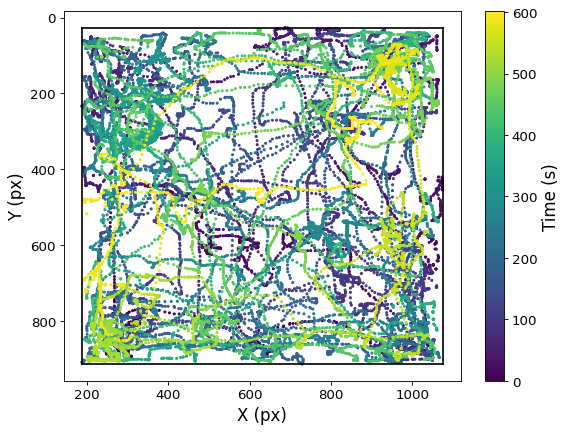

In [29]:
# Plot data_WT_concat (nose)
rat.Trajectory(data_WT_concat, bodyPart='nose', bodyPartBox='nose', fontsize=15, fps = 50)

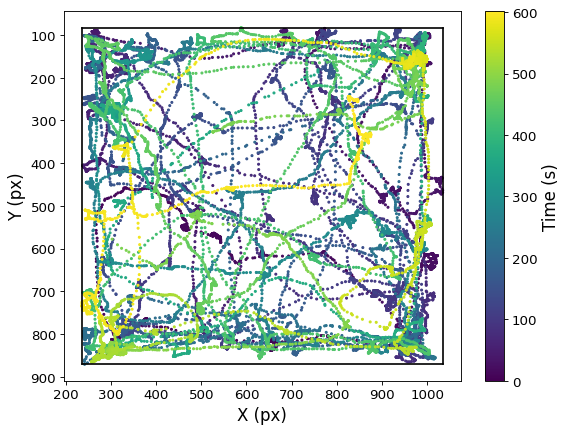

In [30]:
# Plot data_WT_concat (body centre)
rat.Trajectory(data_WT_concat, bodyPart='body centre', bodyPartBox='body centre', fontsize=15, fps = 50)

In [31]:
data_WT_concat.to_csv('data_WT_concat.csv', index=False) #converts WT concat data to excel, saved in working directory

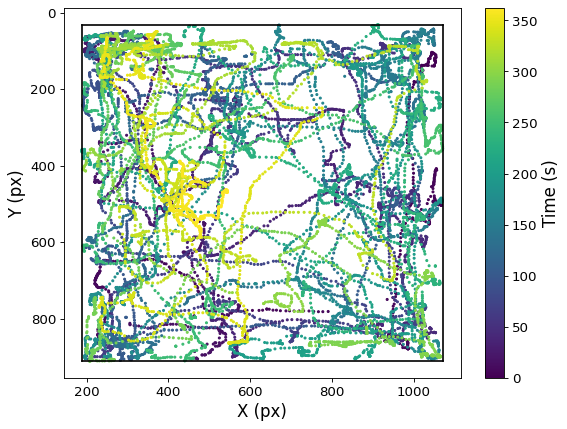

In [32]:
#Plot data_C9_concat (nose)
rat.Trajectory(data_C9_concat, bodyPart='nose', bodyPartBox='nose', fontsize=15,fps = 50)

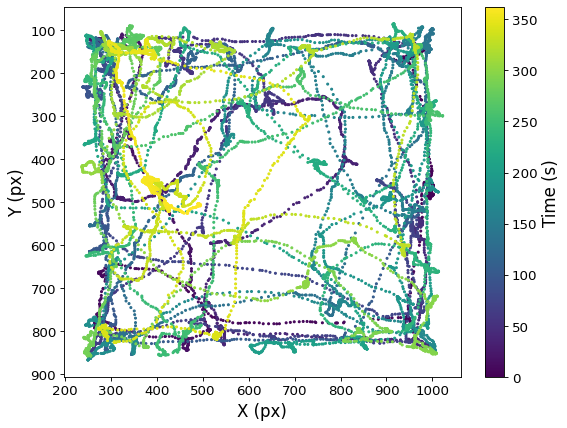

In [33]:
#Plot data_C9_concat (body centre)
rat.Trajectory(data_C9_concat, bodyPart='body centre', fontsize=15, fps = 50)

In [34]:
data_C9_concat.to_csv('data_C9_concat.csv', index=False) #save concat C9 data without using index column

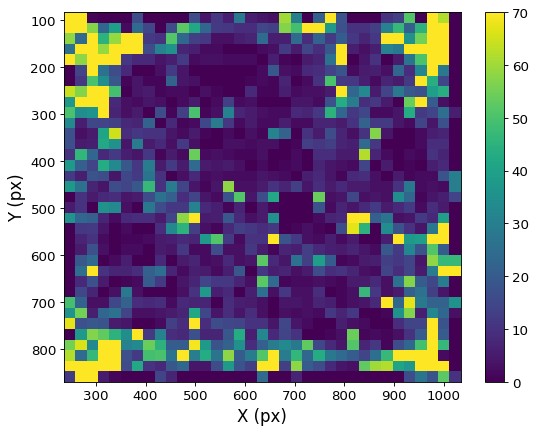

In [35]:
#heat map of data_WT_concat (exploration density; most common location spent at)
rat.Heatmap(data_WT_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 35, fontsize=15, vmax= 70, fps = 50)

#### WildType Pre- Determining fields positions x and y (in pixels)

#### Parameters
----------
posit : dict, optional
    A dictionary to pass objects with directions and not need to use input. It
    must contain a cache and 8 dice ('objt_type','center_x','center_y', 'radius',
    'a_x', 'a_y' , 'height', 'width'), 'obj_type' must be 0 or 1 (0 = circle and 
    1 = rectangle). An example of this dictionary is in Section examples.
plot : bool, optional
    Plot of objects created for ease of use. If you have difficulty in positioning 
    the areas, this parameter will plot the graph where the areas were positioned. 
    It needs to receive the DataFrame of the data and the part of the body that will
    be used to determine the limits of the environment (usually the tail).
data : pandas DataFrame, optional
    The input tracking data.
bodyPartBox : str, optional
    The body part you want to use to estimate the limits of the environment, 
    usually the base of the tail is the most suitable for this determination.

In [36]:
## Edited original code

#line 633 fields = fields.append(df2, ignore_index=True) 
# fields = pd.concat([fields, df2], ignore_index=True)
# line 722 interactsDf = pd.concat([interactsDf, df], ignore_index=True)
# old code interactsDf = interactsDf.append(df, ignore_index=True)

In [37]:
#categorise WT and C9 dataframes in list; loop function
#data_WT = [oft_pre_1,oft_pre_2,oft_pre_5,oft_pre_6,oft_pre_8]
#data_C9 = [oft_pre_3_C9,oft_pre_4_C9,oft_pre_7_C9]

In [38]:
#obj = rat.FieldDetermination(posit = area,plot=True,data=df3_1,bodyPartBox='tailBase')

#data_WT_concat
#data_C9_concat

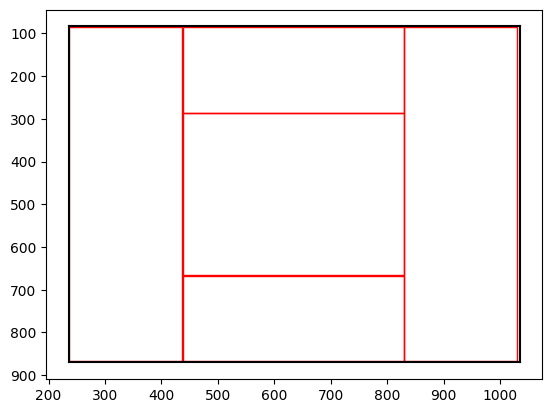

In [39]:
#for field determination in interactions and report
#define areas
area = {'peripheryLeft': [1,0  ,0  ,0 ,237,85,200,782],
        'peripheryRight': [1,0  ,0  ,0 ,830,85,200,782],
        'peripheryTop': [1,0  ,0  ,0 ,438,86,391,200],
        'peripheryBottom': [1,0  ,0  ,0 ,438,667,391,200],
        'Centre': [1,0  ,0  ,0 ,438,287,391,379]}
obj = rat.FieldDetermination(posit = area,plot=True,data=data_WT_concat,bodyPartBox='body centre')

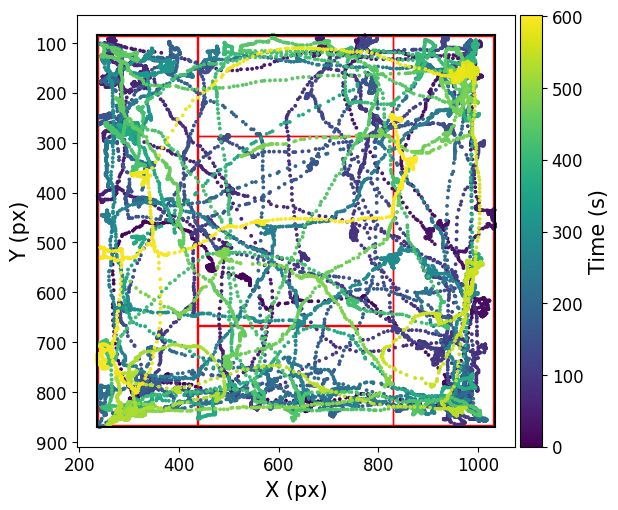

In [40]:
#WT-Pre concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination( posit = area,plot=True,data=data_WT_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_WT_concat,'body centre', ax =axs, fig=fig, fps = 50)
axs.invert_yaxis()
plt.show()

In [41]:
#example report of data_WT
#[oft_pre_1,oft_pre_2,oft_pre_5,oft_pre_6,oft_pre_8]
trial_name = ['OFT_pre_WT_1','OFT_pre_WT_2','OFT_pre_WT_5','OFT_pre_WT_6','OFT_pre_WT_8']
WT_report = rat.Reports(data_WT,list_name = trial_name,bodypart='body centre',fields=obj, fps = 50)
WT_report

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  OFT_pre_WT_1          2.007333  313.274290      2.601082      5.0   
1  OFT_pre_WT_2          2.007000  308.601935      2.562713      8.0   
2  OFT_pre_WT_5          2.007333  253.956498      2.108573      3.0   
3  OFT_pre_WT_6          2.007333  299.887919      2.489936      5.0   
4  OFT_pre_WT_8          1.996000  207.838674      1.735460      7.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         38.42     11.0         45.06      5.0         10.54      4.0   
1         44.26      7.0         35.34      8.0         15.24      7.0   
2         78.90      5.0         19.34      1.0          3.34      3.0   
3         24.92      8.0         59.80     11.0         12.82      6.0   
4         53.48      4.0         50.68      2.0          1.36      4.0   

   time_field_4  field_5  time_field_5  
0          7.72     10.0         17.98  
1         15.78     10.0          9.54  
2          5.80      8.0         12.50  
3         14.08     12.0          8.34  
4          6.34      3.0          7.56

In [42]:
import numpy as np

time = np.arange(0,((1/50)*3000), (1/50))

time/60

array([0.00000000e+00, 3.33333333e-04, 6.66666667e-04, ...,
       9.99000000e-01, 9.99333333e-01, 9.99666667e-01])

In [43]:
WT_report_rename = WT_report.rename(columns={
    'field_1': 'no. peripheryLeft', #number of interactions in that field
    'field_2': 'no. peripheryRight',
    'field_3': 'no. peripheryTop', 
    'field_4': 'no. peripheryBottom', 
    'field_5': 'no. Centre',
    'time_field_1': 'peripheryLeft_time (S)',
    'time_field_2': 'peripheryRight_time (s)',
    'time_field_3': 'peripheryTop_time (s)', 
    'time_field_4': 'peripheryBottom_time (s)', 
    'time_field_5': 'Centre_time (s)'})
WT_report_rename.to_csv('WT_report_rename.csv', index=False)
WT_report_rename

file  video time (min)   dist (cm)  speed (cm/s)  \
0  OFT_pre_WT_1          2.007333  313.274290      2.601082   
1  OFT_pre_WT_2          2.007000  308.601935      2.562713   
2  OFT_pre_WT_5          2.007333  253.956498      2.108573   
3  OFT_pre_WT_6          2.007333  299.887919      2.489936   
4  OFT_pre_WT_8          1.996000  207.838674      1.735460   

   no. peripheryLeft  peripheryLeft_time (S)  no. peripheryRight  \
0                5.0                   38.42                11.0   
1                8.0                   44.26                 7.0   
2                3.0                   78.90                 5.0   
3                5.0                   24.92                 8.0   
4                7.0                   53.48                 4.0   

   peripheryRight_time (s)  no. peripheryTop  peripheryTop_time (s)  \
0                    45.06               5.0                  10.54   
1                    35.34               8.0                  15.24   
2                    19.34               1.0                   3.34   
3                    59.80              11.0                  12.82   
4                    50.68               2.0                   1.36   

   no. peripheryBottom  peripheryBottom_time (s)  no. Centre  Centre_time (s)  
0                  4.0                      7.72        10.0            17.98  
1                  7.0                     15.78        10.0             9.54  
2                  3.0                      5.80         8.0            12.50  
3                  6.0                     14.08        12.0             8.34  
4                  4.0                      6.34         3.0             7.56

In [44]:
#interactions within each field for concat data WT
interactions_pre_wt, _ = rat.Interaction(data_WT_concat,'body centre',obj, fps = 50)
interactions_pre_wt.to_csv('interactions_pre_wt.csv', index=False)
interactions_pre_wt.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0     1     2      3      4      5      6      7      8      9    ...  \
start     0 -0.02   1.1   4.26  10.22   16.3  29.76  29.92  30.14  30.24  ...   
end   -0.02   1.1  4.26  10.22   16.3  29.76  29.92  30.14  30.24  30.56  ...   
obj       0   2.0   4.0    1.0    5.0    2.0    0.0    2.0    0.0    2.0  ...   

          193     194     195     196     197     198     199    200     201  \
start  592.78  592.86  595.88  597.76  597.82  597.94  597.96  600.8   601.0   
end    592.86  595.88  597.76  597.82  597.94  597.96   600.8  601.0  601.02   
obj       0.0     1.0     5.0     0.0     5.0     0.0     2.0    3.0     0.0   

          202  
start  601.02  
end    601.58  
obj       2.0  

[3 rows x 203 columns]

In [45]:
#checking how the software calculates time. They do it by finding difference from time in one area to the next one.
#When plotting in the interaction graph, the start of the area (width) has a certain time and ends at a certain time.
interactions_pre_wt['diff'] = interactions_pre_wt['end'] - interactions_pre_wt['start']

#[l[int(i)] for i in interactions_pre_wt['obj']]
interactions_pre_wt.head()
#interactions_pre_wt['obj']

start    end  obj  diff
0      0  -0.02    0 -0.02
1  -0.02   1.10  2.0  1.12
2    1.1   4.26  4.0  3.16
3   4.26  10.22  1.0  5.96
4  10.22  16.30  5.0  6.08

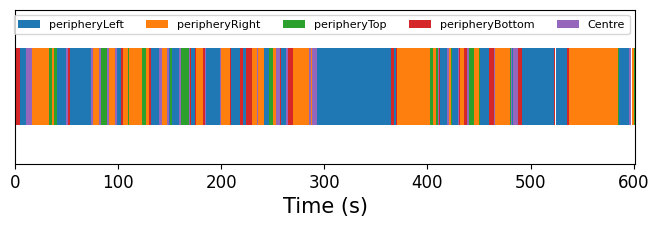

In [46]:
#plot interactions pre_wt
#dict=names needs to be specified if you can it to replace original are names 'fields'
dict_names = {1:'peripheryLeft',  
     2:'peripheryRight',
     3:'peripheryTop', 
     4:'peripheryBottom', 
     5:'Centre'}

rat.PlotInteraction(interactions_pre_wt, dict_names, fps = 50)

#### C9orf72 Pre- Determining fields positions x and y (in pixels)

In [47]:
#data_C9 = [oft_pre_3_C9,oft_pre_4_C9,oft_pre_7_C9]
#data_C9_concat

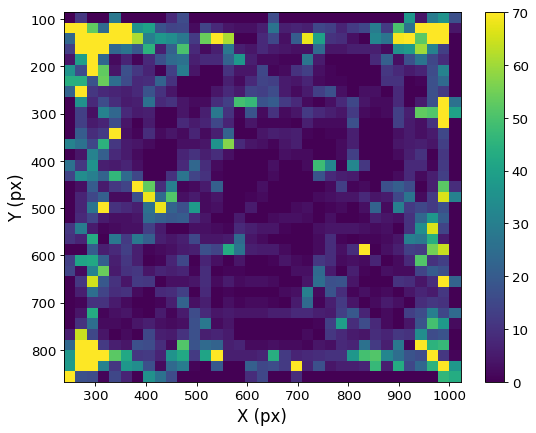

In [48]:
##heat map of data_C9_concat (exploration density; most common location spent at)
rat.Heatmap(data_C9_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 35, fontsize=15, vmax= 70,fps = 50)

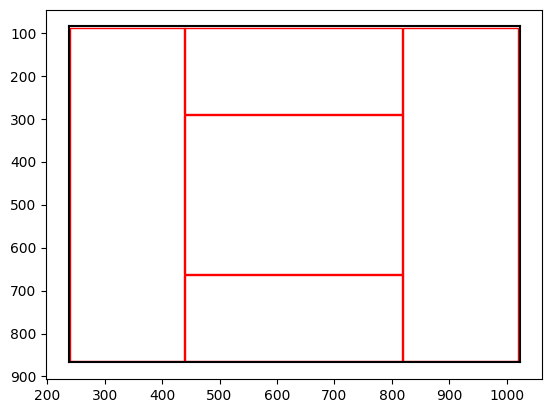

In [49]:
#for field determination in interactions and report
#define areas
area_C9 = {'peripheryLeft': [1,0  ,0  ,0 ,240,90,200,773],
        'peripheryRight': [1,0  ,0  ,0 ,819,90,200,773],
        'peripheryTop': [1,0  ,0  ,0 ,438,90,380,200],
        'peripheryBottom': [1,0  ,0  ,0 ,438,663,380,200],
        'Centre': [1,0  ,0  ,0 ,438,291,380,371]}

obj_C9 = rat.FieldDetermination(posit = area_C9 ,plot=True,data=data_C9_concat,bodyPartBox='body centre')

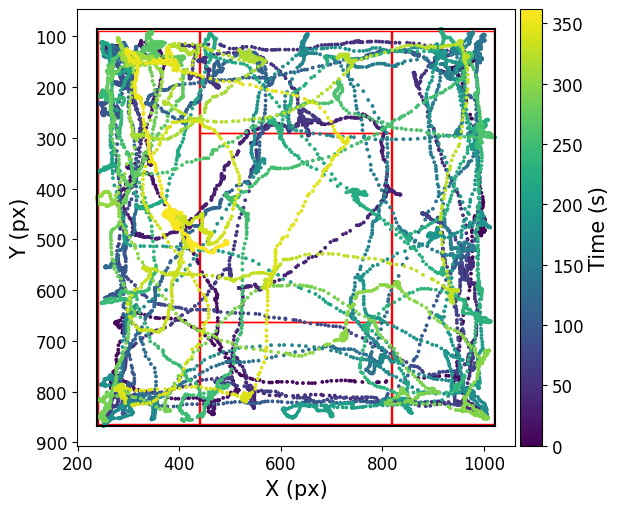

In [50]:
#C9-Pre concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination(posit = area_C9 ,plot=True,data=data_C9_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_C9_concat,'body centre', ax =axs, fig=fig, fps = 50)
axs.invert_yaxis()
plt.show()

In [51]:
#report for pre_c9
#[oft_pre_3_C9,oft_pre_4_C9,oft_pre_7_C9]
trial_name_pre_c9 = ['oft_pre_3_C9','oft_pre_4_C9','oft_pre_7_C9']
WT_report_pre_c9 = rat.Reports(data_C9,list_name = trial_name_pre_c9,bodypart='body centre',fields=obj_C9, fps = 50)
WT_report_pre_c9

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  oft_pre_3_C9          2.007333  303.507542      2.519990      9.0   
1  oft_pre_4_C9          2.007000  315.556932      2.620469      6.0   
2  oft_pre_7_C9          2.016667  316.237938      2.613537     11.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         57.50      6.0         30.16      8.0         13.52      7.0   
1         30.40     10.0         58.94      6.0          8.02      7.0   
2         71.46      5.0         19.64      6.0          9.30      8.0   

   time_field_4  field_5  time_field_5  
0         10.38      9.0          8.76  
1         13.08     11.0          9.24  
2          7.54      9.0         12.54

In [52]:
C9_pre_report_rename = WT_report_pre_c9.rename(columns={
    'field_1': 'no. peripheryLeft', #number of interactions in that field
    'field_2': 'no. peripheryRight',
    'field_3': 'no. peripheryTop', 
    'field_4': 'no. peripheryBottom', 
    'field_5': 'no. Centre',
    'time_field_1': 'peripheryLeft_time (S)',
    'time_field_2': 'peripheryRight_time (s)',
    'time_field_3': 'peripheryTop_time (s)', 
    'time_field_4': 'peripheryBottom_time (s)', 
    'time_field_5': 'Centre_time (s)'})
C9_pre_report_rename.to_csv('C9_pre_report_rename.csv', index=False)
C9_pre_report_rename

file  video time (min)   dist (cm)  speed (cm/s)  \
0  oft_pre_3_C9          2.007333  303.507542      2.519990   
1  oft_pre_4_C9          2.007000  315.556932      2.620469   
2  oft_pre_7_C9          2.016667  316.237938      2.613537   

   no. peripheryLeft  peripheryLeft_time (S)  no. peripheryRight  \
0                9.0                   57.50                 6.0   
1                6.0                   30.40                10.0   
2               11.0                   71.46                 5.0   

   peripheryRight_time (s)  no. peripheryTop  peripheryTop_time (s)  \
0                    30.16               8.0                  13.52   
1                    58.94               6.0                   8.02   
2                    19.64               6.0                   9.30   

   no. peripheryBottom  peripheryBottom_time (s)  no. Centre  Centre_time (s)  
0                  7.0                     10.38         9.0             8.76  
1                  7.0                     13.08        11.0             9.24  
2                  8.0                      7.54         9.0            12.54

In [53]:
#interactions within each field for concat data C9
interactions_pre_C9,_ = rat.Interaction(data_C9_concat,'body centre',obj_C9, fps = 50)
interactions_pre_C9.to_csv('interactions_pre_C9.csv', index=False)
interactions_pre_C9.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0     1     2      3      4      5      6      7      8      9    ...  \
start     0 -0.02  5.94   7.08  14.06  16.68  17.24  30.22   31.5  31.66  ...   
end   -0.02  5.94  7.08  14.06  16.68  17.24  30.22   31.5  31.66  31.68  ...   
obj       0   2.0   4.0    1.0    4.0    5.0    1.0    5.0    3.0    0.0  ...   

          129     130     131     132     133     134     135     136     137  \
start  337.04   338.1  338.26  338.28   338.4  341.26  343.72  345.22  345.82   
end     338.1  338.26  338.28   338.4  341.26  343.72  345.22  345.82  360.38   
obj       1.0     5.0     0.0     4.0     1.0     4.0     5.0     3.0     1.0   

          138  
start  360.38  
end     361.9  
obj       5.0  

[3 rows x 139 columns]

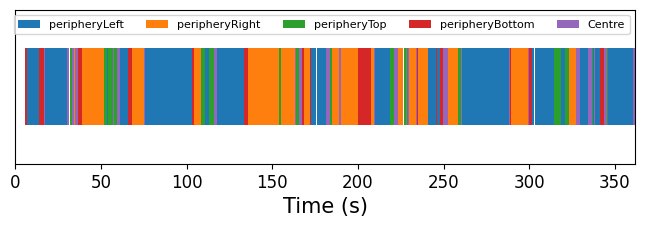

In [54]:
#change plot names
dict_names = {1:'peripheryLeft',  
     2:'peripheryRight',
     3:'peripheryTop', 
     4:'peripheryBottom', 
     5:'Centre'}

#plot interactions pre_C9
#MAKE SURE YOU ADD DICT_NAMES
rat.PlotInteraction(interactions_pre_C9, dict_names, fps = 50)

#### WT Post- (OFT)

In [55]:
#Read post-symptomatic data (trials 1-8)
oft_post_1_C9 = pd.read_csv('OFT post-trial 1DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_2 = pd.read_csv('OFT post-trial 2DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_3 = pd.read_csv('OFT post-trial 3DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_4_C9 = pd.read_csv('OFT post-trial 4DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_5 = pd.read_csv('OFT post-trial 5DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_6_C9 = pd.read_csv('OFT post-trial 6DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_7 = pd.read_csv('OFT post-trial 7DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')
oft_post_8 = pd.read_csv('OFT post-trial 8DLC_resnet50_OFT (pre-post)Apr4shuffle1_40000_filtered.csv')

In [56]:
#categorise WT and C9 dataframes in list; loop function
data_WT_post = [oft_post_2,oft_post_3,oft_post_5,oft_post_7,oft_post_8]
data_C9_post = [oft_post_1_C9,oft_post_4_C9,oft_post_6_C9]

In [57]:
#concatenate data by group
data_WT_post_element = data_WT_post[0] #assigns value of first element in list to list-like object (data_WT_element)
data_C9_post_element = data_C9_post[0]

In [58]:
# Determine the length of the smaller list
min_length = min(len(data_WT_post), len(data_C9_post))
print(min_length)

3


In [59]:
#for i in range(1,(3)): #loop initialisation for a range of numbers from 1 to min_length  (3). Loop starts from 1
data_WT_post_concat = pd.concat([data_WT_post_element] + [df.iloc[2:] for df in data_WT_post[1:]], ignore_index=True) #concats dataframes in each list excluding first dataframe
data_C9_post_concat = pd.concat([data_C9_post_element] + [df.iloc[2:] for df in data_C9_post[1:]], ignore_index=True) 
#This method remove headings from csv dataset and combines just the raw data into single excel file

In [60]:
data_WT_post_concat.to_csv('data_WT_post_concat.csv', index=False) #save concat post data
data_C9_post_concat.to_csv('data_C9_post_concat.csv', index=False)

In [61]:
len(data_WT_post_concat),len(oft_post_2) #check length of concat data

(15046, 3008)

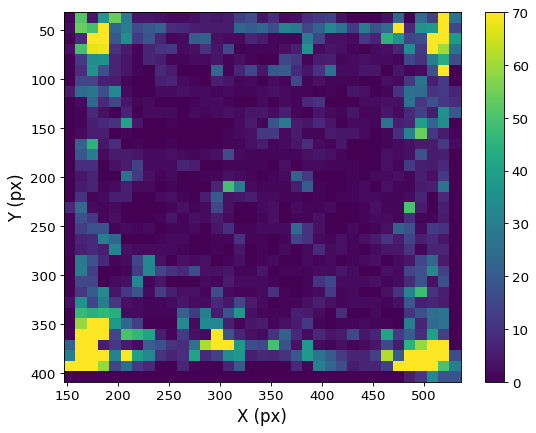

In [62]:
#heat map of data_WT_post_concat (exploration density; most common location spent at)
rat.Heatmap(data_WT_post_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 35, fontsize=15, vmax= 70, fps = 25)

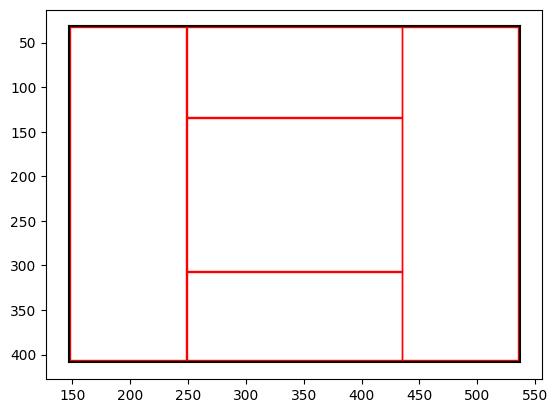

In [63]:
#for field determination in interactions and report
#define areas
area_WT_post = {'peripheryLeft': [1,0  ,0  ,0 ,148,33,100,373],
        'peripheryRight': [1,0  ,0  ,0 ,435,33,100,373],
        'peripheryTop': [1,0  ,0  ,0 ,249,33,186,100],
        'peripheryBottom': [1,0  ,0  ,0 ,249,306,186,100],
        'Centre': [1,0  ,0  ,0 ,249,134,186,173]}

obj_WT_post = rat.FieldDetermination(posit = area_WT_post ,plot=True,data=data_WT_post_concat,bodyPartBox='body centre')

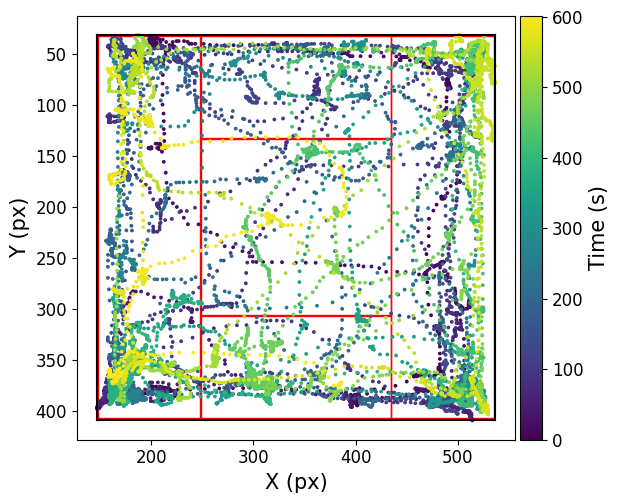

In [64]:
#WT-post concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination(posit = area_WT_post ,plot=True,data=data_WT_post_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_WT_post_concat,'body centre', ax =axs, fig=fig, fps = 25)
axs.invert_yaxis()
plt.show()

In [65]:
#WT_post report
trial_name_WT_post = ['oft_post_2','oft_post_3','oft_post_5','oft_post_7','oft_post_8']
WT_post_report = rat.Reports(data_WT_post,list_name = trial_name_WT_post,bodypart='body centre',fields=obj_WT_post, fps = 25)
WT_post_report

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  oft_post_2          2.003333  140.961995      1.172729      9.0   
1  oft_post_3          2.005333  119.057649      0.989508      7.0   
2  oft_post_5          2.006667  129.862778      1.078594      4.0   
3  oft_post_7          2.006667  136.126036      1.130615      2.0   
4  oft_post_8          2.004000  143.685302      1.194988      5.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         43.88      7.0         54.88      5.0          7.72      5.0   
1         53.56      5.0         42.68      7.0         10.12      4.0   
2         65.60      3.0         30.36      3.0         12.88      5.0   
3         33.40      3.0         47.00      2.0          4.32      2.0   
4         58.24      7.0         38.96      3.0          1.76      6.0   

   time_field_4  field_5  time_field_5  
0          8.68      4.0          4.36  
1          8.20      8.0          5.72  
2          9.40      3.0          2.08  
3         24.12      5.0         11.48  
4         12.88      5.0          7.28

In [66]:
WT_post_report_rename = WT_post_report.rename(columns={
    'field_1': 'no. peripheryLeft', #number of interactions in that field
    'field_2': 'no. peripheryRight',
    'field_3': 'no. peripheryTop', 
    'field_4': 'no. peripheryBottom', 
    'field_5': 'no. Centre',
    'time_field_1': 'peripheryLeft_time (S)',
    'time_field_2': 'peripheryRight_time (s)',
    'time_field_3': 'peripheryTop_time (s)', 
    'time_field_4': 'peripheryBottom_time (s)', 
    'time_field_5': 'Centre_time (s)'})
WT_post_report_rename.to_csv('WT_post_report_rename.csv', index=False)
WT_post_report_rename

file  video time (min)   dist (cm)  speed (cm/s)  no. peripheryLeft  \
0  oft_post_2          2.003333  140.961995      1.172729                9.0   
1  oft_post_3          2.005333  119.057649      0.989508                7.0   
2  oft_post_5          2.006667  129.862778      1.078594                4.0   
3  oft_post_7          2.006667  136.126036      1.130615                2.0   
4  oft_post_8          2.004000  143.685302      1.194988                5.0   

   peripheryLeft_time (S)  no. peripheryRight  peripheryRight_time (s)  \
0                   43.88                 7.0                    54.88   
1                   53.56                 5.0                    42.68   
2                   65.60                 3.0                    30.36   
3                   33.40                 3.0                    47.00   
4                   58.24                 7.0                    38.96   

   no. peripheryTop  peripheryTop_time (s)  no. peripheryBottom  \
0               5.0                   7.72                  5.0   
1               7.0                  10.12                  4.0   
2               3.0                  12.88                  5.0   
3               2.0                   4.32                  2.0   
4               3.0                   1.76                  6.0   

   peripheryBottom_time (s)  no. Centre  Centre_time (s)  
0                      8.68         4.0             4.36  
1                      8.20         8.0             5.72  
2                      9.40         3.0             2.08  
3                     24.12         5.0            11.48  
4                     12.88         5.0             7.28

In [67]:
#interactions within each field for concat data WT_post
interactions_post_wt,_ = rat.Interaction(data_WT_post_concat,'body centre',obj_WT_post, fps = 25)
interactions_post_wt.to_csv('interactions_post_wt.csv', index=False)
interactions_post_wt.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0     1     2      3      4      5      6      7      8      9    ...  \
start     0 -0.04  2.64   4.28  11.68  13.48  19.84  20.92   34.8  38.44  ...   
end   -0.04  2.64  4.28  11.68  13.48  19.84  20.92   34.8  38.44  45.84  ...   
obj       0   1.0   4.0    2.0    3.0    1.0    5.0    2.0    4.0    1.0  ...   

          124     125     126     127     128     129     130     131     132  \
start  557.88  564.76  566.92  566.96  589.28  589.36  589.64  594.84  594.88   
end    564.76  566.92  566.96  589.28  589.36  589.64  594.84  594.88   599.6   
obj       2.0     4.0     0.0     1.0     5.0     3.0     5.0     0.0     1.0   

          133  
start   599.6  
end    601.72  
obj       4.0  

[3 rows x 134 columns]

In [68]:
interactions_post_wt

start     end  obj
0         0   -0.04    0
1     -0.04    2.64  1.0
2      2.64    4.28  4.0
3      4.28   11.68  2.0
4     11.68   13.48  3.0
..      ...     ...  ...
129  589.36  589.64  3.0
130  589.64  594.84  5.0
131  594.84  594.88  0.0
132  594.88  599.60  1.0
133   599.6  601.72  4.0

[134 rows x 3 columns]

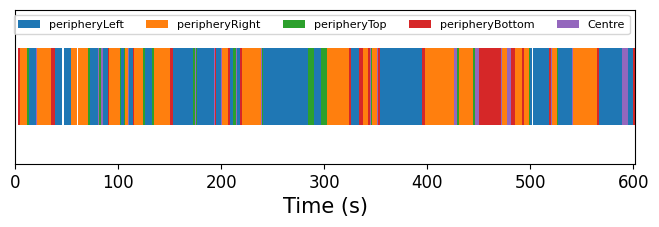

In [69]:
#change plot names
dict_names = {1:'peripheryLeft',  
     2:'peripheryRight',
     3:'peripheryTop', 
     4:'peripheryBottom', 
     5:'Centre'}

#plot interactions post_wt
rat.PlotInteraction(interactions_post_wt, dict_names, fps = 25)

#### C9 Post- (OFT)

In [70]:
#data_C9_post = [oft_post_1_C9,oft_post_4_C9,oft_post_6_C9]
#data_C9_post_concat

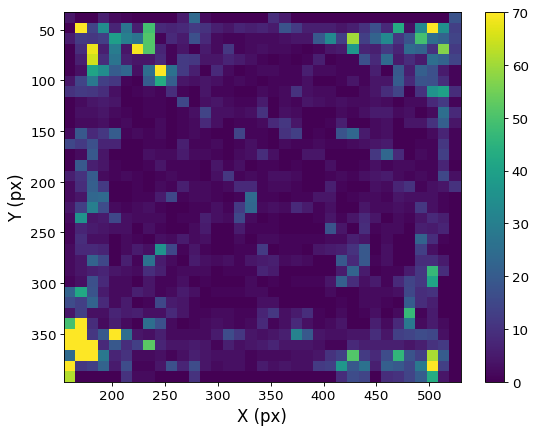

In [71]:
#heat map of data_WT_post_concat (exploration density; most common location spent at)
rat.Heatmap(data_C9_post_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 35, fontsize=15, vmax= 70, fps = 25)

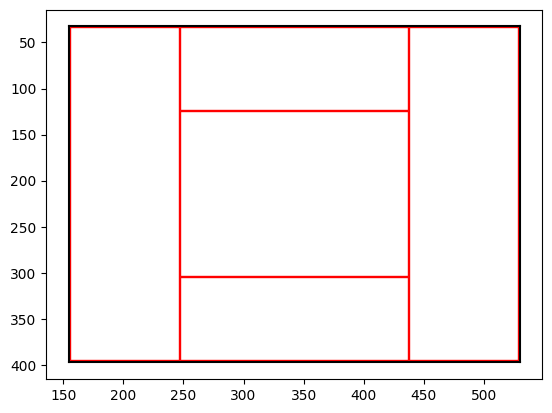

In [72]:
#for field determination in interactions and report
#define areas
area_C9_post = {'peripheryLeft': [1,0  ,0  ,0 ,156,33,90,362],
        'peripheryRight': [1,0  ,0  ,0 ,438,33,90,362],
        'peripheryTop': [1,0  ,0  ,0 ,247,33,190,90],
        'peripheryBottom': [1,0  ,0  ,0 ,247,305,190,90],
        'Centre': [1,0  ,0  ,0 ,247,124,190,179]}

obj_C9_post = rat.FieldDetermination(posit = area_C9_post ,plot=True,data=data_C9_post_concat,bodyPartBox='body centre')

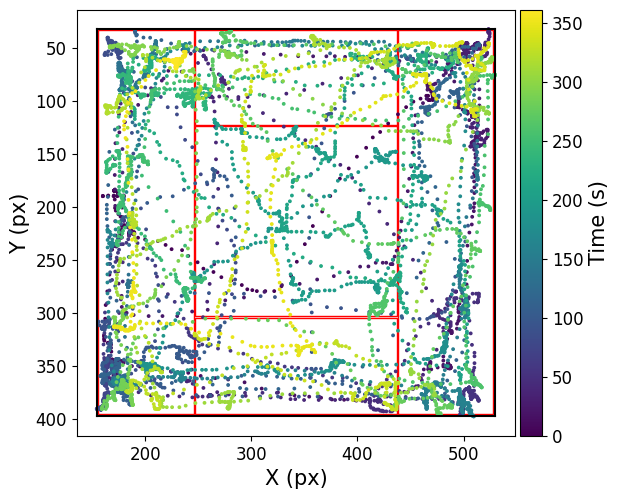

In [73]:
#C9-post concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination(posit = area_C9_post ,plot=True,data=data_C9_post_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_C9_post_concat,'body centre', ax =axs, fig=fig, fps = 25)
axs.invert_yaxis()
plt.show()

In [74]:
#C9_post report
trial_name_C9_post = ['oft_post_1_C9','oft_post_4_C9','oft_post_6_C9']
C9_post_report = rat.Reports(data_C9_post,list_name = trial_name_C9_post,bodypart='body centre',fields=obj_C9_post, fps = 25)
C9_post_report

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  oft_post_1_C9          2.002667  124.127811      1.033021     12.0   
1  oft_post_4_C9          2.012667  143.225798      1.186037      8.0   
2  oft_post_6_C9          1.998000  150.096046      1.252052      7.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         61.56     10.0         39.32      7.0          3.68     11.0   
1         50.92      9.0         31.80      9.0         12.72      3.0   
2         51.48      9.0         29.40      7.0         15.28      8.0   

   time_field_4  field_5  time_field_5  
0          9.36      8.0          5.20  
1          5.32      7.0         19.12  
2         12.56      8.0         10.08

In [75]:
C9_post_report_rename = C9_post_report.rename(columns={
    'field_1': 'no. peripheryLeft', #number of interactions in that field
    'field_2': 'no. peripheryRight',
    'field_3': 'no. peripheryTop', 
    'field_4': 'no. peripheryBottom', 
    'field_5': 'no. Centre',
    'time_field_1': 'peripheryLeft_time (S)',
    'time_field_2': 'peripheryRight_time (s)',
    'time_field_3': 'peripheryTop_time (s)', 
    'time_field_4': 'peripheryBottom_time (s)', 
    'time_field_5': 'Centre_time (s)'})
C9_post_report_rename.to_csv('C9_post_report_rename.csv', index=False)
C9_post_report_rename

file  video time (min)   dist (cm)  speed (cm/s)  \
0  oft_post_1_C9          2.002667  124.127811      1.033021   
1  oft_post_4_C9          2.012667  143.225798      1.186037   
2  oft_post_6_C9          1.998000  150.096046      1.252052   

   no. peripheryLeft  peripheryLeft_time (S)  no. peripheryRight  \
0               12.0                   61.56                10.0   
1                8.0                   50.92                 9.0   
2                7.0                   51.48                 9.0   

   peripheryRight_time (s)  no. peripheryTop  peripheryTop_time (s)  \
0                    39.32               7.0                   3.68   
1                    31.80               9.0                  12.72   
2                    29.40               7.0                  15.28   

   no. peripheryBottom  peripheryBottom_time (s)  no. Centre  Centre_time (s)  
0                 11.0                      9.36         8.0             5.20  
1                  3.0                      5.32         7.0            19.12  
2                  8.0                     12.56         8.0            10.08

In [76]:
#interactions within each field for concat data WT_post
interactions_post_C9,_ = rat.Interaction(data_C9_post_concat,'body centre',obj_C9_post, fps = 25)
interactions_post_C9.to_csv('interactions_post_C9.csv', index=False)
interactions_post_C9.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0     1     2     3      4      5      6      7     8      9    ...  \
start     0 -0.04  0.72  0.76   1.72  15.04  15.64  15.68  23.0   23.8  ...   
end   -0.04  0.72  0.76  1.72  15.04  15.64  15.68   23.0  23.8  25.12  ...   
obj       0   2.0   3.0   5.0    1.0    4.0    0.0    2.0   5.0    1.0  ...   

          152     153     154     155     156     157     158     159     160  \
start   333.6  335.08  335.12  337.24  337.28   344.6  344.64  345.08  347.44   
end    335.08  335.12  337.24  337.28   344.6  344.64  345.08  347.44  349.12   
obj       5.0     0.0     3.0     0.0     2.0     0.0     3.0     5.0     4.0   

          161  
start  349.12  
end    360.88  
obj       1.0  

[3 rows x 162 columns]

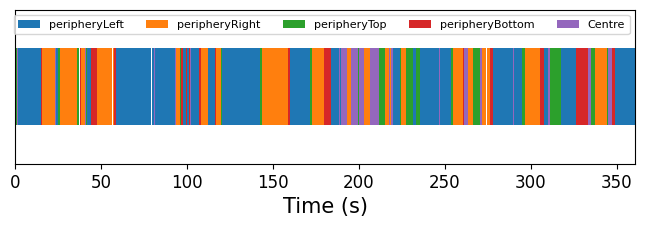

In [77]:
#change plot names
dict_names = {1:'peripheryLeft',  
     2:'peripheryRight',
     3:'peripheryTop', 
     4:'peripheryBottom', 
     5:'Centre'}

#plot interactions post_C9
rat.PlotInteraction(interactions_post_C9, dict_names, fps = 25)

### Combine all heatmap (OFT)

Text(0.02, 0.5, '    Post-symptomatic                                                 Pre-symptomatic')

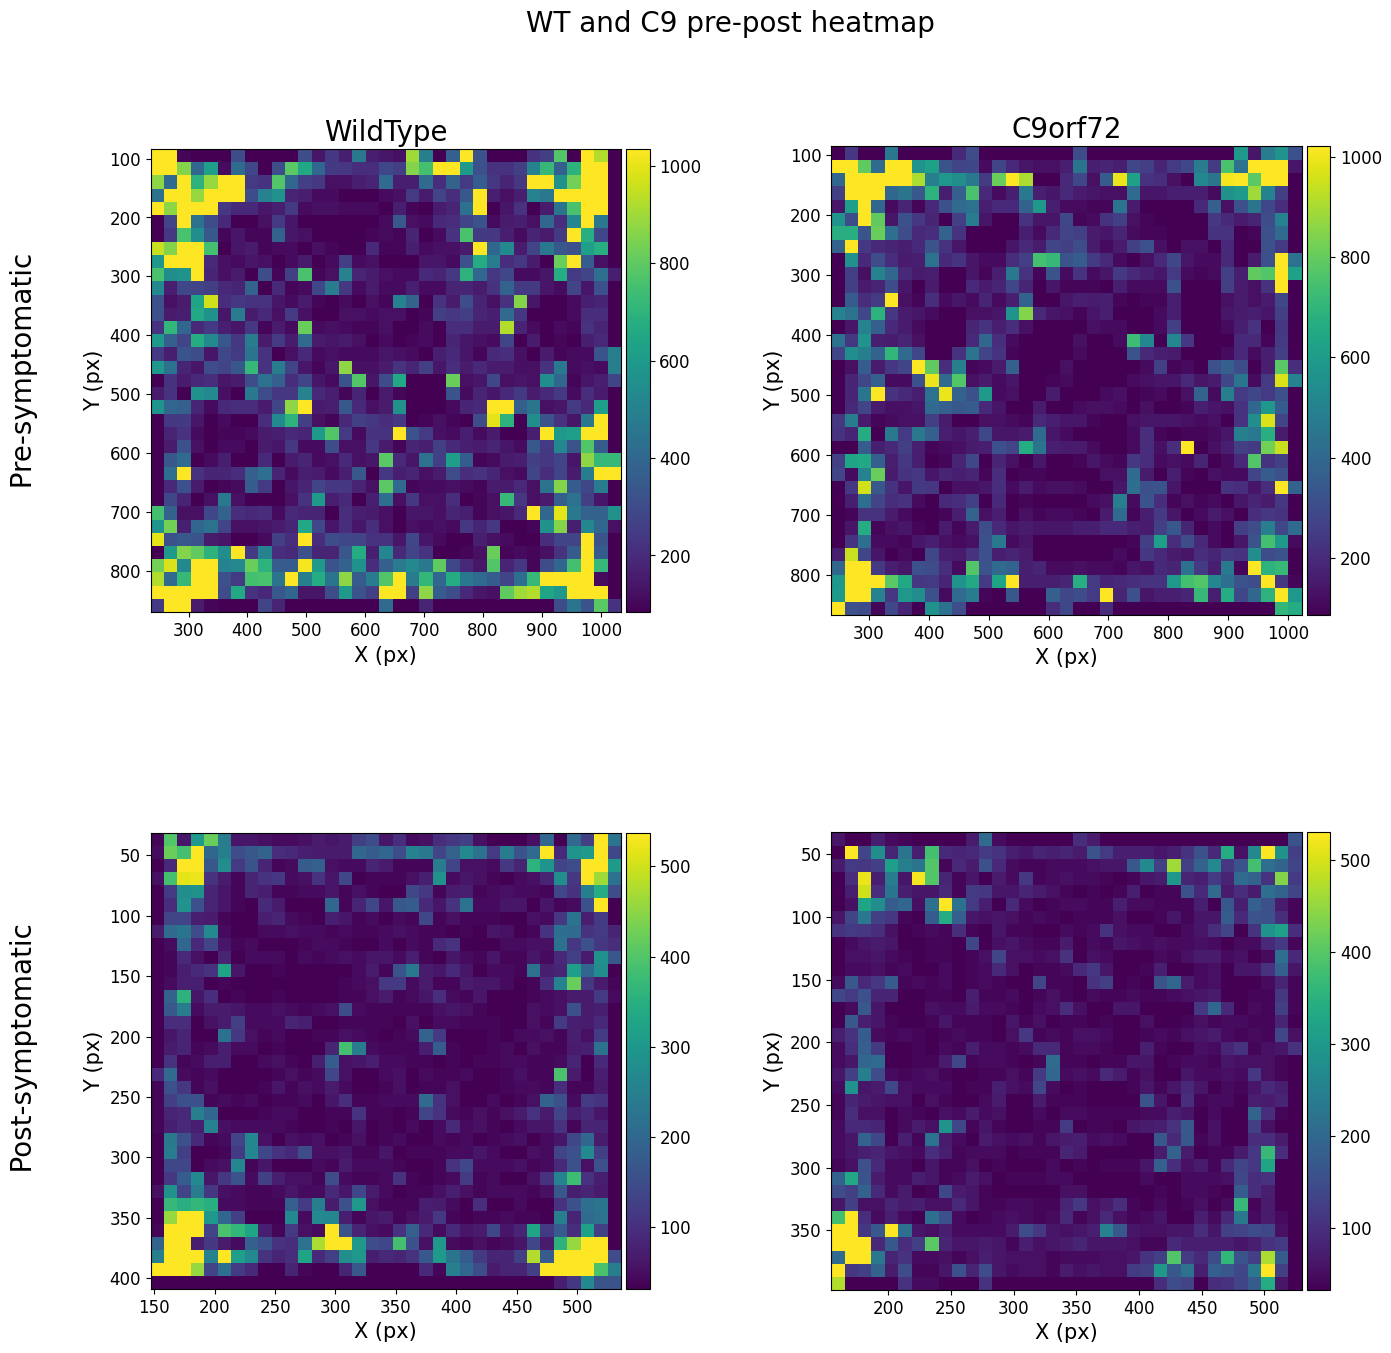

In [78]:
fig, axs = plt.subplots( 2, 2,figsize=(15,15))
fig.tight_layout(pad = 10)


fig.suptitle('WT and C9 pre-post heatmap', fontsize = 20)
rat.Heatmap(data_WT_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 35, fig=fig, ax=axs[0][0], fontsize=15, fps = 50, vmax = 70)
ax=axs[0][0].set_title('WildType', fontsize=20)
rat.Heatmap(data_C9_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 35, fig=fig, ax=axs[0][1], fontsize=15, fps = 50, vmax = 70)
ax=axs[0][1].set_title('C9orf72', fontsize=20)
rat.Heatmap(data_WT_post_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 35, fontsize=15, fig=fig, ax=axs[1][0], fps = 25, vmax = 70)
rat.Heatmap(data_C9_post_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 35, fontsize=15, fig=fig, ax=axs[1][1], fps = 25, vmax = 70)
fig.supylabel('    Post-symptomatic                                                 Pre-symptomatic', fontsize = 20)

### Combine all trajectory graphs (OFT)

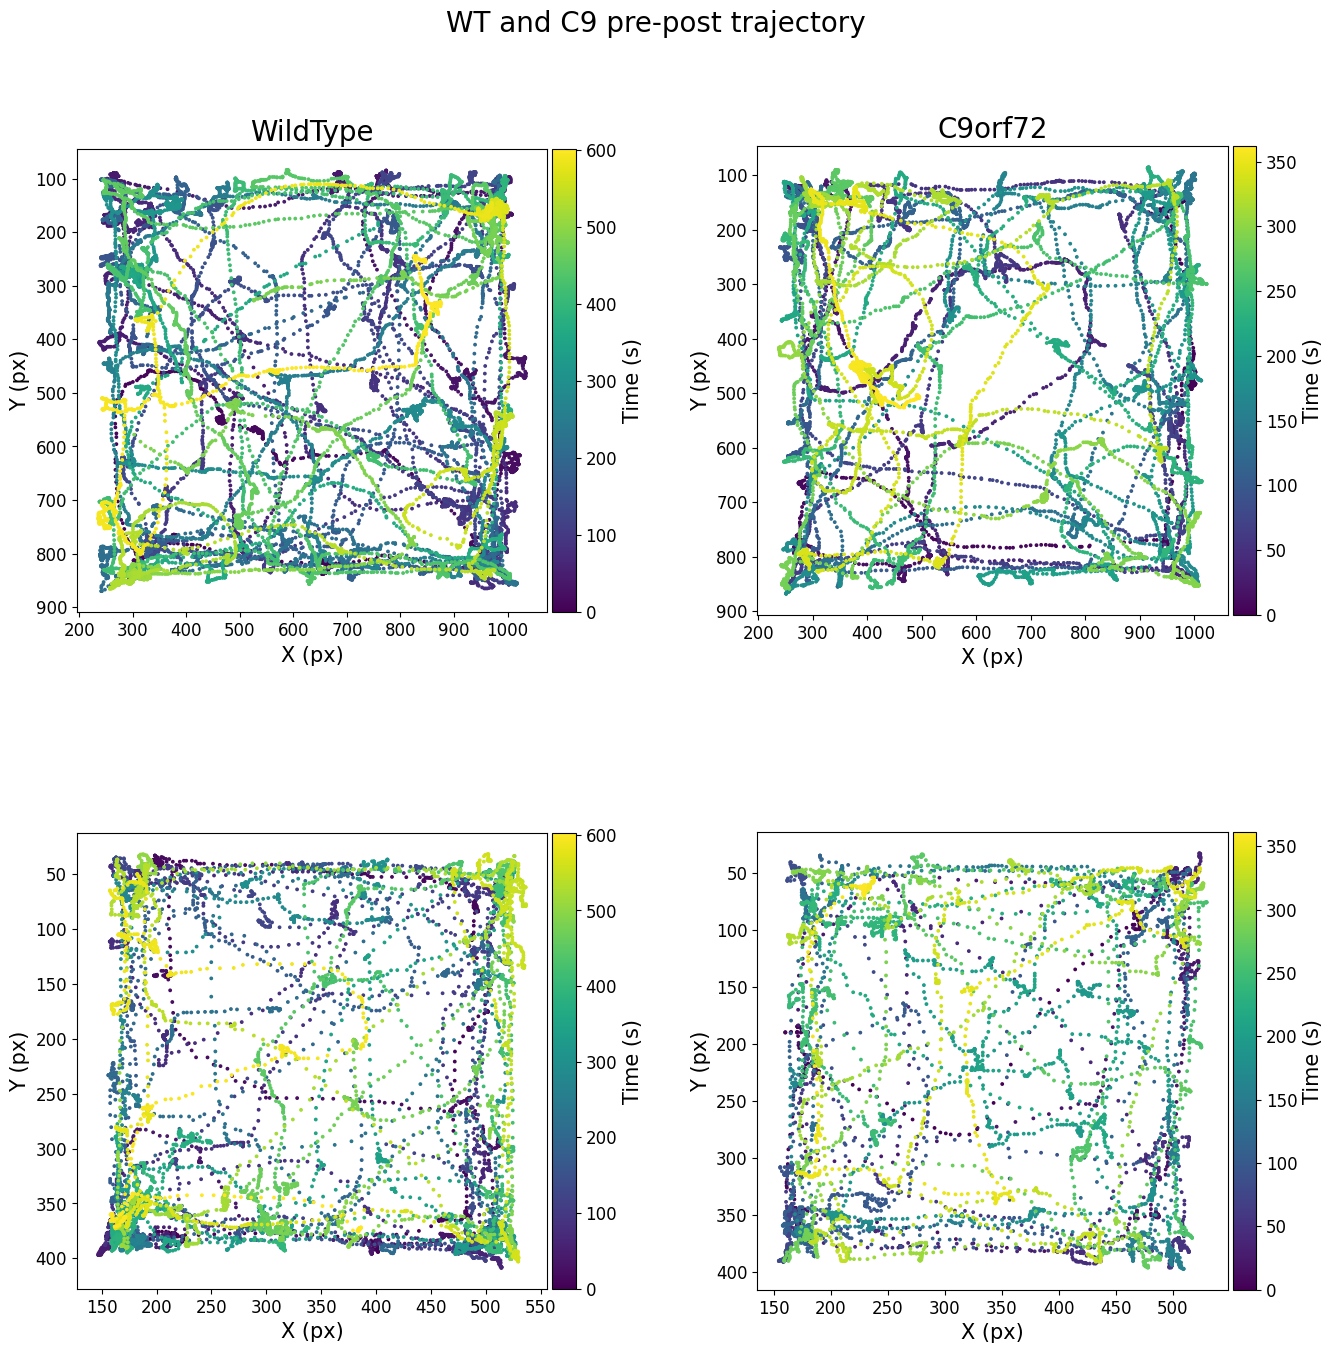

In [79]:
fig, axs = plt.subplots( 2, 2,figsize=(15,15))
fig.tight_layout(pad = 10)


fig.suptitle('WT and C9 pre-post trajectory', fontsize = 20)


rat.Trajectory(data_WT_concat,'body centre', fig=fig,ax = axs[0][0], fps = 50)
ax=axs[0][0].set_title('WildType', fontsize=20)
rat.Trajectory(data_C9_concat,'body centre', fig=fig,ax = axs[0][1], fps = 50)
ax=axs[0][1].set_title('C9orf72', fontsize=20)
rat.Trajectory(data_WT_post_concat,'body centre', fig=fig, ax = axs[1][0], fps = 25)
rat.Trajectory(data_C9_post_concat,'body centre', fig=fig, ax = axs[1][1], fps = 25)


In [80]:
#rat.FieldDetermination( posit = area,plot=True,data=data_WT_concat,bodyPartBox='body centre', ax =axs[0,0], ret=False)
#rat.Trajectory(data_WT_concat,'body centre',  fig=fig,ax = axs[0][0], figureTitle = 'Wildtype', figsize=(6, 6))

#rat.FieldDetermination(posit = area_C9 ,plot=True,data=data_C9_concat,bodyPartBox='body centre', ax =axs[0,1], ret=False)
#rat.Trajectory(data_C9_concat,'body centre', fig=fig,ax = axs[0][1], figureTitle = 'C9orf72', figsize=(6, 6))

#rat.FieldDetermination(posit = area_WT_post ,plot=True,data=data_WT_post_concat,bodyPartBox='body centre', ax =axs[1,0], ret=False)
#rat.Trajectory(data_WT_post_concat,'body centre', fig=fig, ax = axs[1][0], figsize=(6, 6))

#rat.FieldDetermination(posit = area_C9_post ,plot=True,data=data_C9_post_concat,bodyPartBox='body centre', ax =axs[1,1], ret=False)
#rat.Trajectory(data_C9_post_concat,'body centre', fig=fig, ax = axs[1][1], figsize=(6, 6))

#plt.show()

In [81]:

#define areas for each subplot
#areas_pre = {
#    'WT': {'peripheryLeft': [1, 0, 0, 0, 237, 85, 200, 782],
#           'peripheryRight': [1, 0, 0, 0, 830, 85, 200, 782],
#           'peripheryTop': [1, 0, 0, 0, 438, 86, 391, 200],
#           'peripheryBottom': [1, 0, 0, 0, 438, 667, 391, 200],
#           'Centre': [1, 0, 0, 0, 438, 287, 391, 379]},
#    'C9': {'peripheryLeft': [1, 0, 0, 0, 240, 90, 200, 773],
#           'peripheryRight': [1, 0, 0, 0, 819, 90, 200, 773],
#           'peripheryTop': [1, 0, 0, 0, 438, 90, 380, 200],
#           'peripheryBottom': [1, 0, 0, 0, 438, 663, 380, 200],
#           'Centre': [1, 0, 0, 0, 438, 291, 380, 371]}
#}

#areas_post = {
 #   'WT': {'peripheryLeft': [1, 0, 0, 0, 148, 33, 100, 373],
#            'peripheryRight': [1, 0, 0, 0, 435, 33, 100, 373],
#            'peripheryTop': [1, 0, 0, 0, 249, 33, 186, 100],
#            'peripheryBottom': [1, 0, 0, 0, 249, 306, 186, 100],
#            'Centre': [1, 0, 0, 0, 249, 134, 186, 173]},
 #   'C9': {'peripheryLeft': [1, 0, 0, 0, 156, 33, 90, 362],
#            'peripheryRight': [1, 0, 0, 0, 438, 33, 90, 362],
#            'peripheryTop': [1, 0, 0, 0, 247, 33, 190, 90],
#            'peripheryBottom': [1, 0, 0, 0, 247, 305, 190, 90],
#            'Centre': [1, 0, 0, 0, 247, 124, 190, 179]}
#}

#fig, axs = plt.subplots( 2, 2,figsize=(15,15))
#fig.tight_layout(pad = 10)
#fig.suptitle('WT and C9 pre-post trajectory', fontsize = 20)

# Loop through each subplot for pre-trajectory data
#for i, (condition, areas) in enumerate(areas_pre.items()):
#    ax = axs[0, i]  # Determine current Axes instance
#    ax.set_title(f'{condition} - Pre')  # Set subplot title
#    rat.FieldDetermination(posit=areas, plot=True, data=data_WT_concat if condition == 'WT' else data_C9_concat, bodyPartBox='body centre', ax=ax, ret=False)
#    rat.Trajectory(data_WT_concat if condition == 'WT' else data_C9_concat, 'body centre', fig=fig, ax=ax, figureTitle=f'{condition} - Pre', figsize=(6, 6))

# Loop through each subplot for post-trajectory data
#for i, (condition, areas) in enumerate(areas_post.items()):
 #   ax = axs[1, i]  # Determine current Axes instance
#    ax.set_title(f'{condition} - Post')  # Set subplot title
#    rat.FieldDetermination(posit=areas, plot=True, data=data_WT_post_concat if condition == 'WT' else data_C9_post_concat, bodyPartBox='body centre', ax=ax, ret=False)
#    rat.Trajectory(data_WT_post_concat if condition == 'WT' else data_C9_post_concat, 'body centre', fig=fig, ax=ax, figureTitle=f'{condition} - Post', figsize=(6, 6))



#plt.show()

### Combine all interaction (OFT)

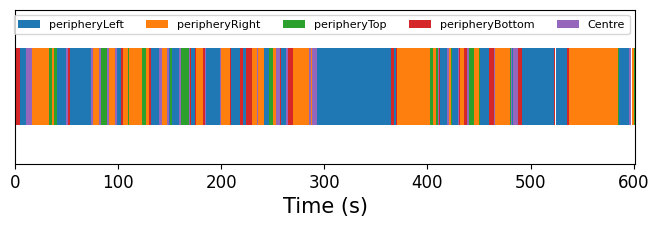

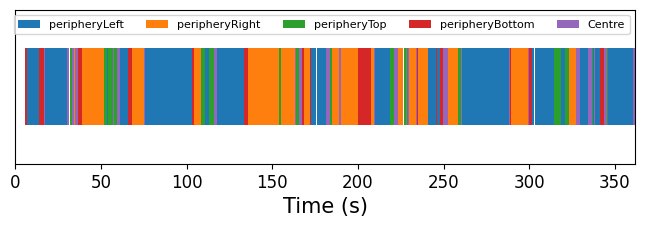

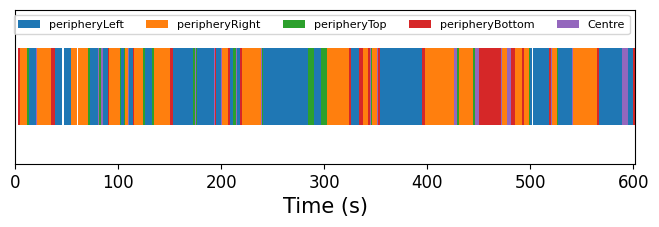

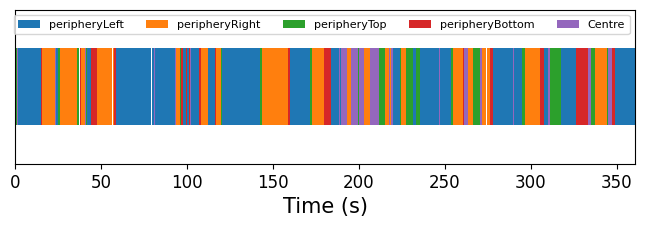

In [82]:

fig.suptitle('WT and C9 pre-post trajectory', fontsize = 20)
rat.PlotInteraction(interactions_pre_wt, dict_names, fps = 50)

rat.PlotInteraction(interactions_pre_C9, dict_names, fps = 50)

rat.PlotInteraction(interactions_post_wt, dict_names, fps = 25)

rat.PlotInteraction(interactions_post_C9, dict_names, fps = 25)



#### EPM WT Post-

In [83]:
#assign working directly for excel files
%cd "C:\Users\User\OneDrive - University of St Andrews\Desktop\DLC directory\Copy Raw Data DLC"

C:\Users\User\OneDrive - University of St Andrews\Desktop\DLC directory\Copy Raw Data DLC


In [84]:
#Read post-symptomatic data (trials 1-8)
epm_post_1_c9 = pd.read_csv('EPM Trial 1 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_2 = pd.read_csv('EPM Trial 2 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_3 = pd.read_csv('EPM Trial 3 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_5_c9 = pd.read_csv('EPM Trial 5 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_7 = pd.read_csv('EPM Trial 7 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_8 = pd.read_csv('EPM Trial 8 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_9_c9 = pd.read_csv('EPM Trial 9 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')
epm_post_10 = pd.read_csv('EPM Trial 10 - TrimDLC_resnet50_EPM (post-)Apr9shuffle1_25000_filtered.csv')

In [85]:
#catgeorise data into group
data_EPM_WT = [epm_post_2,epm_post_3,epm_post_7,epm_post_8,epm_post_10]
data_EPM_C9 = [epm_post_1_c9,epm_post_5_c9,epm_post_9_c9]

In [86]:
#concatenate data by group
data_epmWT_element = data_EPM_WT[0] #assigns value of first element in list to list-like object (data_WT_element)
data_epmC9_element = data_EPM_C9[0]

In [87]:
# Determine the length of the smaller list
min_length_epm = min(len(data_EPM_WT), len(data_EPM_C9))
print(min_length)

3


In [88]:
for i in range(1,(min_length)): #loop initialisation for a range of numbers from 1 to min_length  (3). Loop starts from 1
    data_EPM_WT_concat = pd.concat([data_epmWT_element] + [df.iloc[2:] for df in data_EPM_WT[1:]], ignore_index=True) #concats dataframes in each list excluding first dataframe
    data_EPM_C9_concat = pd.concat([data_epmC9_element] + [df.iloc[2:] for df in data_EPM_C9[1:]], ignore_index=True) #exclude the first two elements (data_WT[i][2:]) of the i-th element and then assigns the result to data_WT_append. 

In [89]:
len(data_EPM_WT_concat),len(epm_post_2) #check size of concat data and single data (WT)

(14964, 2994)

In [90]:
len(data_EPM_C9_concat),len(epm_post_1_c9)

(8978, 2994)

In [91]:
data_EPM_WT_concat.to_csv('data_EPM_WT_concat.csv', index=False)
data_EPM_C9_concat.to_csv('data_EPM_C9_concat.csv', index=False)

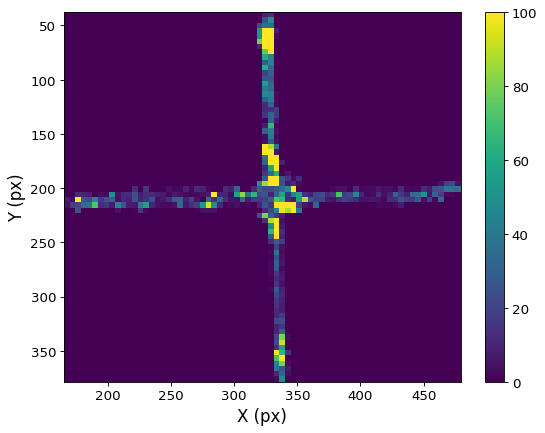

In [92]:
#heat map of data_EPM_WT_concat (exploration density; most common location spent at)
rat.Heatmap(data_EPM_WT_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 70, fontsize=15, vmax=100, fps = 25)

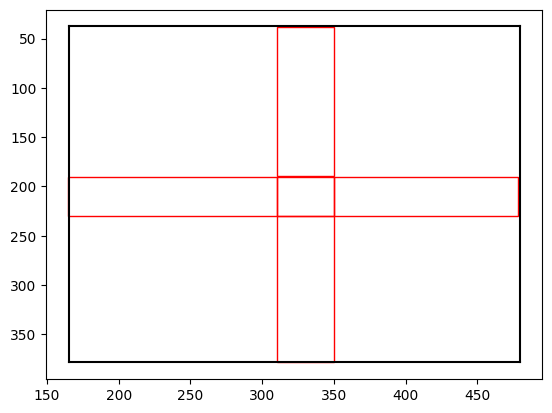

In [93]:
#for field determination in interactions and report
#define areas
area_epm_WT = {'ClosedTop': [1,0  ,0  ,0 ,310,38,40,151],
        'ClosedBottom': [1,0  ,0  ,0 ,310,230,40,148],
        'OpenLeft': [1,0  ,0  ,0 ,165,190,145,40],
        'OpenRight': [1,0  ,0  ,0 ,350,190,128,40],
        'NeutralZone': [1,0  ,0  ,0 ,310,190,40,40]}

obj_epm_WT = rat.FieldDetermination(posit = area_epm_WT ,plot=True,data=data_EPM_WT_concat,bodyPartBox='body centre')

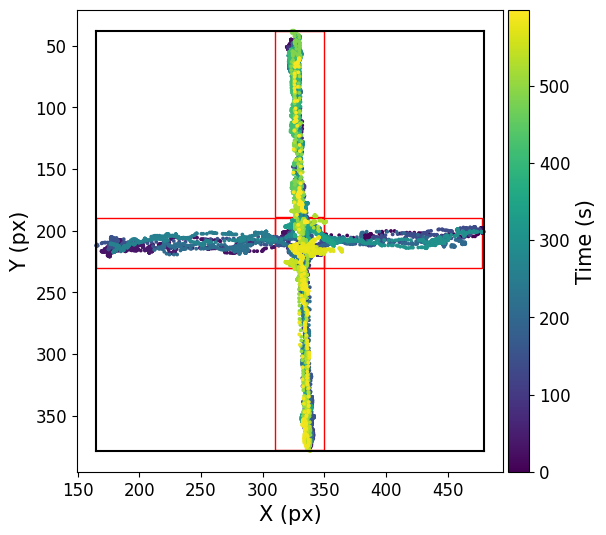

In [94]:
#WT-post-epm concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination(posit = area_epm_WT ,plot=True,data=data_EPM_WT_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_EPM_WT_concat,'body centre', ax =axs, fig=fig, fps = 25)
axs.invert_yaxis()
plt.show()

In [95]:
#WT_post_epm report
trial_name_WT_post_epm = ['epm_post_2', 'epm_post_3', 'epm_post_7', 'epm_post_8', 'epm_post_10']
WT_post_report_epm = rat.Reports(data_EPM_WT,list_name = trial_name_WT_post_epm,bodypart='body centre',fields=obj_epm_WT, fps = 25)
WT_post_report_epm

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0   epm_post_2          1.994000  112.941383      0.944010      3.0   
1   epm_post_3          1.994667  131.417714      1.098076      3.0   
2   epm_post_7          1.994000  117.911907      0.985556      3.0   
3   epm_post_8          1.994667  111.204754      0.929184      1.0   
4  epm_post_10          1.994000  128.145128      1.071089      5.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         48.04      2.0         20.44      1.0         28.04      3.0   
1         31.08      4.0         28.28      2.0         21.64      2.0   
2         24.84      4.0          8.64      2.0         34.40      3.0   
3        119.20      0.0          0.00      0.0          0.00      0.0   
4         22.96      6.0         32.12      0.0          0.00      3.0   

   time_field_4  field_5  time_field_5  
0          9.80      8.0         12.88  
1         23.48     11.0         15.16  
2         20.64     12.0         30.48  
3          0.00      1.0          0.52  
4          2.28     11.0         61.96

In [96]:
WT_post_report_epm_rename = WT_post_report_epm.rename(columns={
    'field_1': 'no. ClosedTop', #number of interactions in that field
    'field_2': 'no. ClosedBottom',
    'field_3': 'no. OpenLeft', 
    'field_4': 'no. OpenRight', 
    'field_5': 'NeutralZone',
    'time_field_1': 'ClosedTop_time (S)',
    'time_field_2': 'ClosedBottom_time (s)',
    'time_field_3': 'OpenLeft_time (s)', 
    'time_field_4': 'OpenRight_time (s)', 
    'time_field_5': 'NeutralZone (s)'})
WT_post_report_epm_rename.to_csv('WT_post_report_epm_rename.csv', index=False)
WT_post_report_epm_rename

file  video time (min)   dist (cm)  speed (cm/s)  no. ClosedTop  \
0   epm_post_2          1.994000  112.941383      0.944010            3.0   
1   epm_post_3          1.994667  131.417714      1.098076            3.0   
2   epm_post_7          1.994000  117.911907      0.985556            3.0   
3   epm_post_8          1.994667  111.204754      0.929184            1.0   
4  epm_post_10          1.994000  128.145128      1.071089            5.0   

   ClosedTop_time (S)  no. ClosedBottom  ClosedBottom_time (s)  no. OpenLeft  \
0               48.04               2.0                  20.44           1.0   
1               31.08               4.0                  28.28           2.0   
2               24.84               4.0                   8.64           2.0   
3              119.20               0.0                   0.00           0.0   
4               22.96               6.0                  32.12           0.0   

   OpenLeft_time (s)  no. OpenRight  OpenRight_time (s)  NeutralZone  \
0              28.04            3.0                9.80          8.0   
1              21.64            2.0               23.48         11.0   
2              34.40            3.0               20.64         12.0   
3               0.00            0.0                0.00          1.0   
4               0.00            3.0                2.28         11.0   

   NeutralZone (s)  
0            12.88  
1            15.16  
2            30.48  
3             0.52  
4            61.96

In [97]:
#interactions within each field for concat data WT (epm)
interactions_post_wt_epm, _ = rat.Interaction(data_EPM_WT_concat,'body centre',obj_epm_WT, fps = 25)
interactions_post_wt_epm.to_csv('interactions_post_wt_epm.csv', index=False)
interactions_post_wt_epm.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0     1     2     3    4      5      6      7      8      9    ...  \
start     0 -0.04  0.52  0.72  8.8    9.8  20.52  20.56  23.92  51.96  ...   
end   -0.04  0.52  0.72   8.8  9.8  20.52  20.56  23.92  51.96  54.96  ...   
obj       0   4.0   0.0   4.0  5.0    1.0    0.0    5.0    3.0    5.0  ...   

          92      93      94      95      96      97      98      99      100  \
start  534.92  544.44  548.08  548.56   567.8  569.64  582.44  589.68  590.64   
end    544.44  548.08  548.56   567.8  569.64  582.44  589.68  590.64  597.52   
obj       2.0     5.0     2.0     5.0     4.0     5.0     2.0     5.0     1.0   

          101  
start  597.52  
end    598.44  
obj       5.0  

[3 rows x 102 columns]

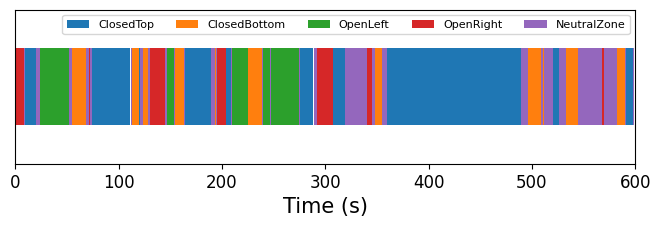

In [98]:
#plot interactions post_wt_epm
#dict=names needs to be specified if you can it to replace original are names 'fields'
dict_names_epm = {1:'ClosedTop',  
     2:'ClosedBottom',
     3:'OpenLeft', 
     4:'OpenRight', 
     5:'NeutralZone'}

rat.PlotInteraction(interactions_post_wt_epm, dict_names_epm, fps = 25,start=0, end = 600)

#### EPM C9 Post-

In [99]:
#data_EPM_C9
#data_EPM_C9_concat

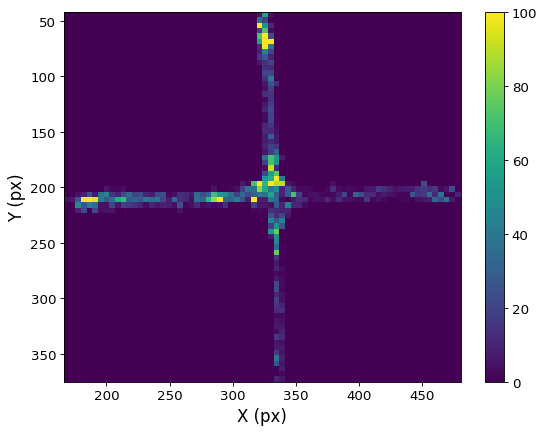

In [100]:
#heat map of data_EPM_C9_concat (exploration density; most common location spent at)
rat.Heatmap(data_EPM_C9_concat, bodyPart = "body centre", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 70, fontsize=15, vmax= 100, fps = 25)

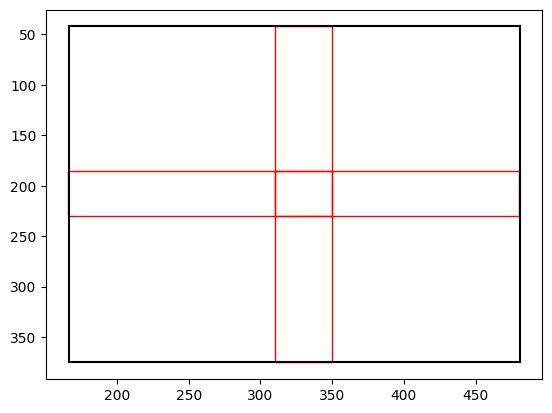

In [101]:
#for field determination in interactions and report
#define areas
area_epm_C9 = {'ClosedTop': [1,0  ,0  ,0 ,310,42,40,143],
        'ClosedBottom': [1,0  ,0  ,0 ,310,230,40,145],
        'OpenLeft': [1,0  ,0  ,0 ,166,185,144,45],
        'OpenRight': [1,0  ,0  ,0 ,350,185,130,45],
        'NeutralZone': [1,0  ,0  ,0 ,310,185,40,45]}

obj_epm_C9 = rat.FieldDetermination(posit = area_epm_C9 ,plot=True,data=data_EPM_C9_concat,bodyPartBox='body centre')

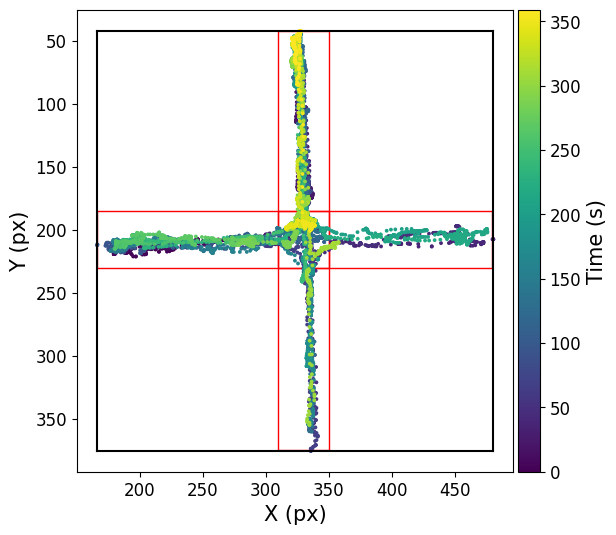

In [102]:
#C9-post-epm concat plot with areas defined
fig, axs = plt.subplots( 1, 1,figsize=(6,6))


rat.FieldDetermination(posit = area_epm_C9 ,plot=True,data=data_EPM_C9_concat,bodyPartBox='body centre', ax =axs, ret=False)
rat.Trajectory(data_EPM_C9_concat,'body centre', ax =axs, fig=fig, fps = 25)
axs.invert_yaxis()
plt.show()

In [103]:
#C9_post_epm report
trial_name_C9_post_epm = ['epm_post_1_c9', 'epm_post_5_c9', 'epm_post_9_c9']
C9_post_report_epm = rat.Reports(data_EPM_C9,list_name = trial_name_C9_post_epm,bodypart='body centre',fields=obj_epm_C9, fps = 25)
C9_post_report_epm

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:801: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  relatorio = pd.concat([relatorio, relatorio_temp], ignore_index=True)
c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The be

file  video time (min)   dist (cm)  speed (cm/s)  field_1  \
0  epm_post_1_c9             1.994  134.539120      1.124533      5.0   
1  epm_post_5_c9             1.994  136.341073      1.139594      5.0   
2  epm_post_9_c9             1.994  141.179647      1.180037      4.0   

   time_field_1  field_2  time_field_2  field_3  time_field_3  field_4  \
0         30.04      3.0         10.88      5.0         38.20      2.0   
1         24.72      7.0         18.08      5.0         29.68      1.0   
2         43.32      2.0          5.96      1.0         34.92      2.0   

   time_field_4  field_5  time_field_5  
0         12.16     12.0         27.76  
1         17.96     17.0         29.24  
2          1.24      8.0         34.24

In [104]:
C9_post_report_epm_rename = C9_post_report_epm.rename(columns={
    'field_1': 'no. ClosedTop', #number of interactions in that field
    'field_2': 'no. ClosedBottom',
    'field_3': 'no. OpenLeft', 
    'field_4': 'no. OpenRight', 
    'field_5': 'NeutralZone',
    'time_field_1': 'ClosedTop_time (S)',
    'time_field_2': 'ClosedBottom_time (s)',
    'time_field_3': 'OpenLeft_time (s)', 
    'time_field_4': 'OpenRight_time (s)', 
    'time_field_5': 'NeutralZone (s)'})
C9_post_report_epm_rename.to_csv('C9_post_report_epm_rename.csv', index=False)
C9_post_report_epm_rename

file  video time (min)   dist (cm)  speed (cm/s)  no. ClosedTop  \
0  epm_post_1_c9             1.994  134.539120      1.124533            5.0   
1  epm_post_5_c9             1.994  136.341073      1.139594            5.0   
2  epm_post_9_c9             1.994  141.179647      1.180037            4.0   

   ClosedTop_time (S)  no. ClosedBottom  ClosedBottom_time (s)  no. OpenLeft  \
0               30.04               3.0                  10.88           5.0   
1               24.72               7.0                  18.08           5.0   
2               43.32               2.0                   5.96           1.0   

   OpenLeft_time (s)  no. OpenRight  OpenRight_time (s)  NeutralZone  \
0              38.20            2.0               12.16         12.0   
1              29.68            1.0               17.96         17.0   
2              34.92            2.0                1.24          8.0   

   NeutralZone (s)  
0            27.76  
1            29.24  
2            34.24

In [105]:
#interactions within each field for concat data WT (epm)
interactions_post_C9_epm, _ = rat.Interaction(data_EPM_C9_concat,'body centre',obj_epm_C9, fps = 25)
interactions_post_C9_epm.to_csv('interactions_post_C9_epm.csv', index=False)
interactions_post_C9_epm.T

c:\Users\User\miniforge3\envs\analysis\lib\site-packages\pyratlib\processing.py:716: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  interactsDf = pd.concat([interactsDf, df], ignore_index=True)


0      1      2      3      4      5      6      7      8      9   \
start     0  -0.04  16.16  16.88  23.96   25.8  28.56  29.76  32.36  34.52   
end   -0.04  16.16  16.88  23.96   25.8  28.56  29.76  32.36  34.52   38.8   
obj       0    3.0    5.0    1.0    5.0    3.0    5.0    1.0    5.0    4.0   

       ...      71      72      73      74      75      76      77      78  \
start  ...  300.36  304.84  308.48   309.0  309.56  310.24  310.92  312.44   
end    ...  304.84  308.48   309.0  309.56  310.24  310.92  312.44  332.52   
obj    ...     5.0     2.0     5.0     4.0     5.0     4.0     5.0     1.0   

           79      80  
start  332.52  351.76  
end    351.76   359.0  
obj       5.0     1.0  

[3 rows x 81 columns]

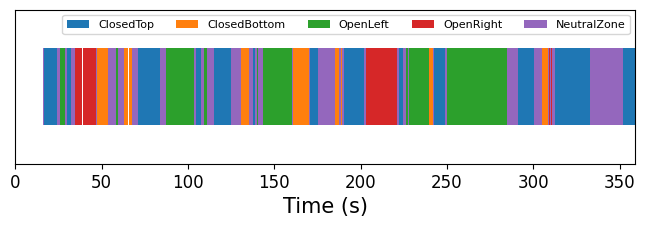

In [106]:
#plot interactions post_wt_epm
#dict=names needs to be specified if you can it to replace original are names 'fields'
dict_names_epm = {1:'ClosedTop',  
     2:'ClosedBottom',
     3:'OpenLeft', 
     4:'OpenRight', 
     5:'NeutralZone'}

rat.PlotInteraction(interactions_post_C9_epm, dict_names_epm, fps = 25)

### Combine all heatmap (EPM)

Text(0.02, 0.5, 'Post-symptomatic')

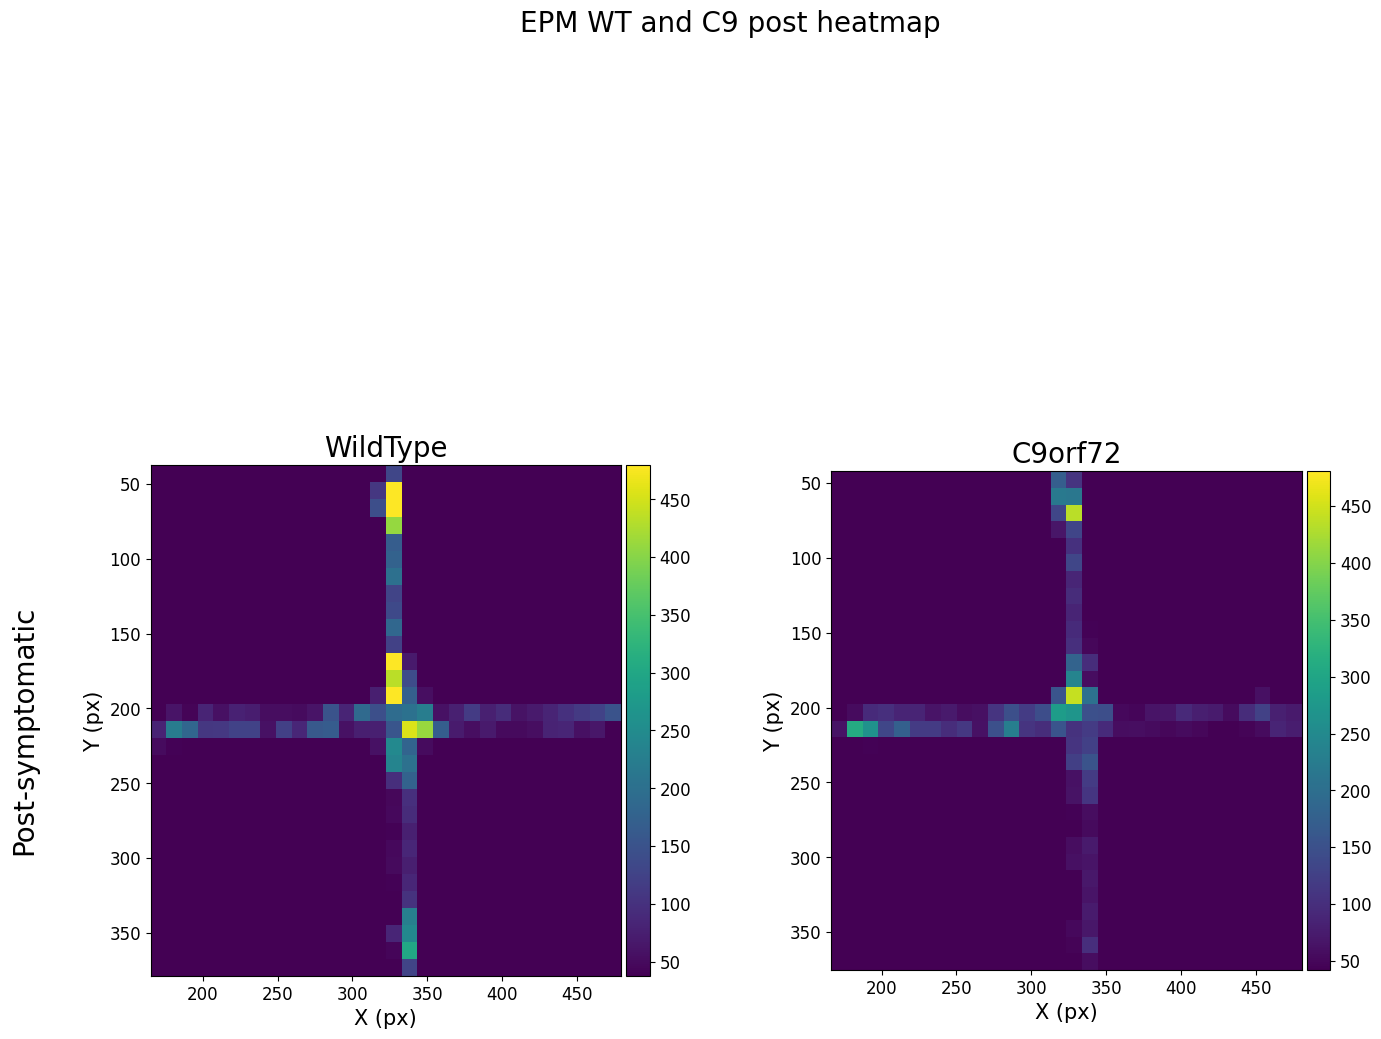

In [107]:
fig, axs = plt.subplots(1, 2,figsize=(15,15))
fig.tight_layout(pad = 10)


fig.suptitle('EPM WT and C9 post heatmap', fontsize = 20)
rat.Heatmap(data_EPM_WT_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 30, vmax= 550, fig=fig, ax=axs[0], fontsize=15, fps = 25)
ax=axs[0].set_title('WildType', fontsize=20)
rat.Heatmap(data_EPM_C9_concat, bodyPart = "body centre", cmapType = 'viridis', hSize=6, wSize =8, bins = 30, vmax= 550, fig=fig, ax=axs[1], fontsize=15, fps = 25)
ax=axs[1].set_title('C9orf72', fontsize=20)
fig.supylabel('Post-symptomatic', fontsize = 20)

### Combine all trajectory graphs (EPM)

Text(0.02, 0.5, 'Post-symptomatic')

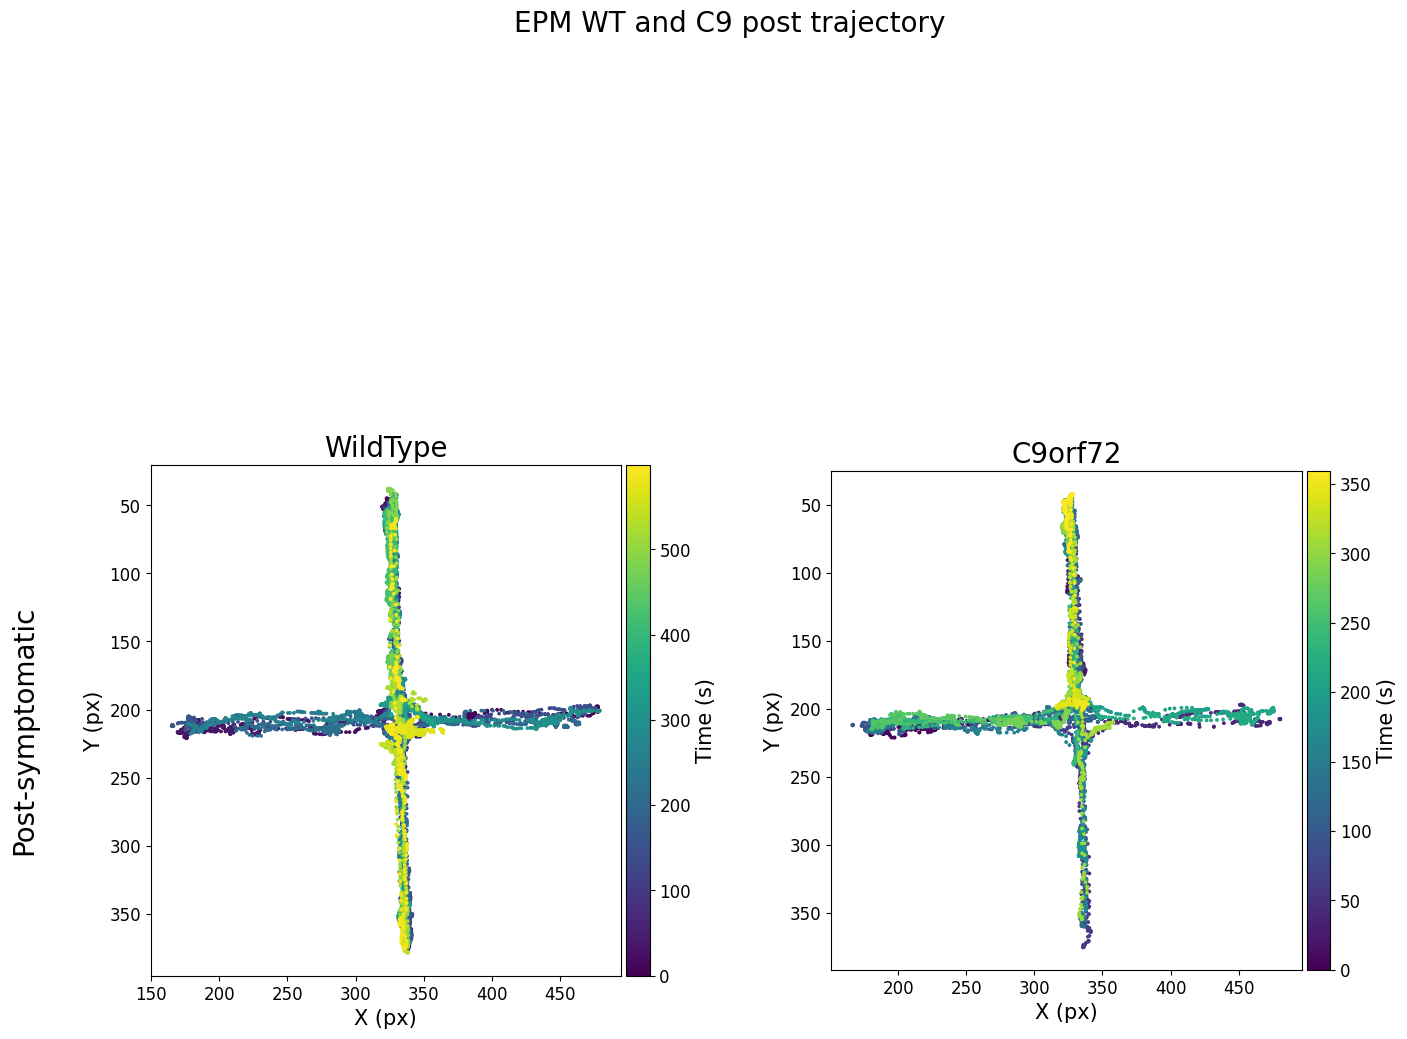

In [108]:
fig, axs = plt.subplots( 1, 2,figsize=(15,15))
fig.tight_layout(pad = 10)


fig.suptitle('EPM WT and C9 post trajectory', fontsize = 20)


rat.Trajectory(data_EPM_WT_concat,'body centre', fig=fig,ax = axs[0], fps = 25)
ax=axs[0].set_title('WildType', fontsize=20)
rat.Trajectory(data_EPM_C9_concat,'body centre', fig=fig,ax = axs[1], fps = 25)
ax=axs[1].set_title('C9orf72', fontsize=20)
fig.supylabel('Post-symptomatic', fontsize = 20)

### Combine all interaction (EPM)

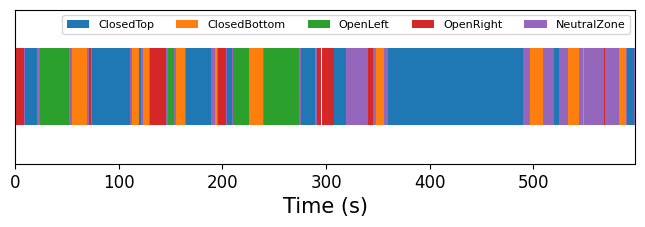

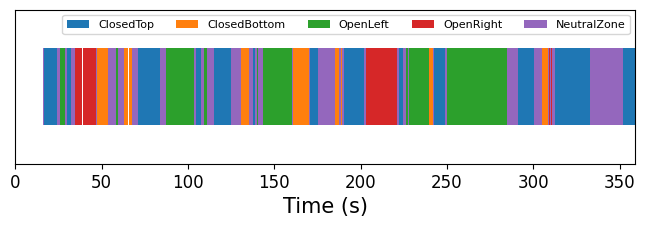

In [109]:

rat.PlotInteraction(interactions_post_wt_epm, dict_names_epm, fps = 25)

rat.PlotInteraction(interactions_post_C9_epm, dict_names_epm, fps = 25)


### Pre-processing of interaction data... [waste of time... reports give u these values, but good for cleaning up data in the future]

###### EPM_WT_ALL

In [110]:
# EPM WT
interactions_post_wt_epm

start     end  obj
0         0   -0.04    0
1     -0.04    0.52  4.0
2      0.52    0.72  0.0
3      0.72    8.80  4.0
4       8.8    9.80  5.0
..      ...     ...  ...
97   569.64  582.44  5.0
98   582.44  589.68  2.0
99   589.68  590.64  5.0
100  590.64  597.52  1.0
101  597.52  598.44  5.0

[102 rows x 3 columns]

In [111]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_post_wt_epm_DIFFERENCE = interactions_post_wt_epm.copy()
interactions_post_wt_epm_DIFFERENCE['diff'] = interactions_post_wt_epm_DIFFERENCE['end'] - interactions_post_wt_epm_DIFFERENCE['start']
interactions_post_wt_epm_DIFFERENCE


start     end  obj  diff
0         0   -0.04    0 -0.04
1     -0.04    0.52  4.0  0.56
2      0.52    0.72  0.0   0.2
3      0.72    8.80  4.0  8.08
4       8.8    9.80  5.0   1.0
..      ...     ...  ...   ...
97   569.64  582.44  5.0  12.8
98   582.44  589.68  2.0  7.24
99   589.68  590.64  5.0  0.96
100  590.64  597.52  1.0  6.88
101  597.52  598.44  5.0  0.92

[102 rows x 4 columns]

In [112]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_post_wt_epm_filter = interactions_post_wt_epm_DIFFERENCE[interactions_post_wt_epm_DIFFERENCE['obj'] != 0.0]
interactions_post_wt_epm_filter

start     end  obj   diff
1     -0.04    0.52  4.0   0.56
3      0.72    8.80  4.0   8.08
4       8.8    9.80  5.0    1.0
5       9.8   20.52  1.0  10.72
7     20.56   23.92  5.0   3.36
..      ...     ...  ...    ...
97   569.64  582.44  5.0   12.8
98   582.44  589.68  2.0   7.24
99   589.68  590.64  5.0   0.96
100  590.64  597.52  1.0   6.88
101  597.52  598.44  5.0   0.92

[87 rows x 4 columns]

In [113]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
tester_interactions_post_wt_epm = interactions_post_wt_epm_filter.copy()
tester_interactions_post_wt_epm = tester_interactions_post_wt_epm.reset_index(drop=True)
for i in range(1, len(tester_interactions_post_wt_epm)):
    tester_interactions_post_wt_epm.loc[i, 'end'] = tester_interactions_post_wt_epm.loc[i, 'start'] + tester_interactions_post_wt_epm.loc[i, 'diff']
    tester_interactions_post_wt_epm.loc[i, 'start'] = tester_interactions_post_wt_epm.loc[i-1, 'end'] 
tester_interactions_post_wt_epm
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

start     end  obj   diff
0    -0.04    0.52  4.0   0.56
1     0.52    8.80  4.0   8.08
2      8.8    9.80  5.0    1.0
3      9.8   20.52  1.0  10.72
4    20.52   23.92  5.0   3.36
..     ...     ...  ...    ...
82  569.64  582.44  5.0   12.8
83  582.44  589.68  2.0   7.24
84  589.68  590.64  5.0   0.96
85  590.64  597.52  1.0   6.88
86  597.52  598.44  5.0   0.92

[87 rows x 4 columns]

In [114]:
#create new column defining mice trials
interactions_post_wt_epm_new_col = tester_interactions_post_wt_epm.copy()
interactions_post_wt_epm_new_col['Trial'] = 0 #create new column

# Assign values based on index ranges
interactions_post_wt_epm_new_col.loc[interactions_post_wt_epm_new_col.index.isin(range(0, 17)), 'Trial'] = 1
interactions_post_wt_epm_new_col.loc[interactions_post_wt_epm_new_col.index.isin(range(17, 39)), 'Trial'] = 2
interactions_post_wt_epm_new_col.loc[interactions_post_wt_epm_new_col.index.isin(range(39, 62)), 'Trial'] = 3
interactions_post_wt_epm_new_col.loc[interactions_post_wt_epm_new_col.index.isin([62]), 'Trial'] = 4
interactions_post_wt_epm_new_col.loc[interactions_post_wt_epm_new_col.index.isin(range(63, 87)), 'Trial'] = 5
interactions_post_wt_epm_new_col

start     end  obj   diff  Trial
0    -0.04    0.52  4.0   0.56      1
1     0.52    8.80  4.0   8.08      1
2      8.8    9.80  5.0    1.0      1
3      9.8   20.52  1.0  10.72      1
4    20.52   23.92  5.0   3.36      1
..     ...     ...  ...    ...    ...
82  569.64  582.44  5.0   12.8      5
83  582.44  589.68  2.0   7.24      5
84  589.68  590.64  5.0   0.96      5
85  590.64  597.52  1.0   6.88      5
86  597.52  598.44  5.0   0.92      5

[87 rows x 5 columns]

In [115]:
#rename diff to time
interactions_post_wt_epm_new_colrename = interactions_post_wt_epm_new_col.rename(columns={'diff' : 'time'})

#Rename zones from numbers to words
RENAME_interactions_post_wt_epm = interactions_post_wt_epm_new_colrename['obj'].replace({1.0:'ClosedTop',
                                                                          2.0:'ClosedBottom',
                                                                          3.0:'OpenLeft',
                                                                          4.0:'OpenRight',
                                                                          5.0:'NeutralZone'})
#rename 'obj' before concatting so there are not 2 column same names
RENAME_interactions_post_wt_epm.name ='Zones'
RENAME_interactions_post_wt_epm

#concat back onto difference dataframe, along with independent timer
CONCAT_interactions_post_wt_epm = pd.concat([interactions_post_wt_epm_new_colrename, RENAME_interactions_post_wt_epm], axis=1).drop('obj', axis=1)
CONCAT_interactions_post_wt_epm = CONCAT_interactions_post_wt_epm[['Trial','Zones', 'time']]
CONCAT_interactions_post_wt_epm

Trial         Zones   time
0       1     OpenRight   0.56
1       1     OpenRight   8.08
2       1   NeutralZone    1.0
3       1     ClosedTop  10.72
4       1   NeutralZone   3.36
..    ...           ...    ...
82      5   NeutralZone   12.8
83      5  ClosedBottom   7.24
84      5   NeutralZone   0.96
85      5     ClosedTop   6.88
86      5   NeutralZone   0.92

[87 rows x 3 columns]

In [116]:

#Groupby trial and zone, sum total time in each zone
GROUP_interactions_post_wt_epm = CONCAT_interactions_post_wt_epm.groupby(['Trial', 'Zones']).agg({'time': 'sum'}).reset_index()
#save excel
GROUP_interactions_post_wt_epm.to_csv('GROUP_interactions_post_wt_epm.csv', index=False)
GROUP_interactions_post_wt_epm

Trial         Zones    time
0       1  ClosedBottom   20.44
1       1     ClosedTop   48.04
2       1   NeutralZone   12.88
3       1      OpenLeft   28.04
4       1     OpenRight     9.8
5       2  ClosedBottom   28.28
6       2     ClosedTop   31.08
7       2   NeutralZone   15.56
8       2      OpenLeft   21.64
9       2     OpenRight   23.48
10      3  ClosedBottom    8.64
11      3     ClosedTop   24.84
12      3   NeutralZone    30.6
13      3      OpenLeft    34.4
14      3     OpenRight   20.64
15      4     ClosedTop  124.88
16      5  ClosedBottom   32.12
17      5     ClosedTop   17.28
18      5   NeutralZone   61.96
19      5     OpenRight    2.28

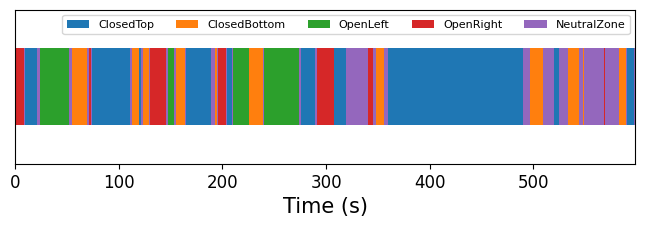

In [117]:
#test plotting interaction graph
tester_interactions_post_wt_epm = tester_interactions_post_wt_epm[['start','end', 'obj']]
rat.PlotInteraction(tester_interactions_post_wt_epm, dict_names_epm, fps = 25)

In [118]:
# EPM C9
interactions_post_C9_epm

start     end  obj
0        0   -0.04    0
1    -0.04   16.16  3.0
2    16.16   16.88  5.0
3    16.88   23.96  1.0
4    23.96   25.80  5.0
..     ...     ...  ...
76  310.24  310.92  4.0
77  310.92  312.44  5.0
78  312.44  332.52  1.0
79  332.52  351.76  5.0
80  351.76  359.00  1.0

[81 rows x 3 columns]

In [119]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_post_C9_epm_DIFFERENCE = interactions_post_C9_epm.copy()
interactions_post_C9_epm_DIFFERENCE['diff'] = interactions_post_C9_epm_DIFFERENCE['end'] - interactions_post_C9_epm_DIFFERENCE['start']
interactions_post_C9_epm_DIFFERENCE

start     end  obj   diff
0        0   -0.04    0  -0.04
1    -0.04   16.16  3.0   16.2
2    16.16   16.88  5.0   0.72
3    16.88   23.96  1.0   7.08
4    23.96   25.80  5.0   1.84
..     ...     ...  ...    ...
76  310.24  310.92  4.0   0.68
77  310.92  312.44  5.0   1.52
78  312.44  332.52  1.0  20.08
79  332.52  351.76  5.0  19.24
80  351.76  359.00  1.0   7.24

[81 rows x 4 columns]

In [120]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_post_C9_epm_filter = interactions_post_C9_epm_DIFFERENCE[interactions_post_C9_epm_DIFFERENCE['obj'] != 0.0]
interactions_post_C9_epm_filter

start     end  obj   diff
1    -0.04   16.16  3.0   16.2
2    16.16   16.88  5.0   0.72
3    16.88   23.96  1.0   7.08
4    23.96   25.80  5.0   1.84
5     25.8   28.56  3.0   2.76
..     ...     ...  ...    ...
76  310.24  310.92  4.0   0.68
77  310.92  312.44  5.0   1.52
78  312.44  332.52  1.0  20.08
79  332.52  351.76  5.0  19.24
80  351.76  359.00  1.0   7.24

[78 rows x 4 columns]

In [121]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
interaction_C9_EPM_ADJUST = interactions_post_C9_epm_filter.copy()
interaction_C9_EPM_ADJUST = interaction_C9_EPM_ADJUST.reset_index(drop=True)
for i in range(1, len(interaction_C9_EPM_ADJUST)):
    interaction_C9_EPM_ADJUST.loc[i, 'end'] = interaction_C9_EPM_ADJUST.loc[i, 'start'] + interaction_C9_EPM_ADJUST.loc[i, 'diff']
    interaction_C9_EPM_ADJUST.loc[i, 'start'] = interaction_C9_EPM_ADJUST.loc[i-1, 'end'] 
interaction_C9_EPM_ADJUST
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

start     end  obj   diff
0    -0.04   16.16  3.0   16.2
1    16.16   16.88  5.0   0.72
2    16.88   23.96  1.0   7.08
3    23.96   25.80  5.0   1.84
4     25.8   28.56  3.0   2.76
..     ...     ...  ...    ...
73  310.24  310.92  4.0   0.68
74  310.92  312.44  5.0   1.52
75  312.44  332.52  1.0  20.08
76  332.52  351.76  5.0  19.24
77  351.76  359.00  1.0   7.24

[78 rows x 4 columns]

In [122]:
#create new column defining mice trials
interactions_post_C9_epm_new_col = interaction_C9_EPM_ADJUST.copy()
interactions_post_C9_epm_new_col['Trial'] = 0 #create new column

# Assign values based on index ranges
interactions_post_C9_epm_new_col.loc[interactions_post_C9_epm_new_col.index.isin(range(0, 26)), 'Trial'] = 1
interactions_post_C9_epm_new_col.loc[interactions_post_C9_epm_new_col.index.isin(range(26, 61)), 'Trial'] = 2
interactions_post_C9_epm_new_col.loc[interactions_post_C9_epm_new_col.index.isin(range(61, 78)), 'Trial'] = 3
interactions_post_C9_epm_new_col

start     end  obj   diff  Trial
0    -0.04   16.16  3.0   16.2      1
1    16.16   16.88  5.0   0.72      1
2    16.88   23.96  1.0   7.08      1
3    23.96   25.80  5.0   1.84      1
4     25.8   28.56  3.0   2.76      1
..     ...     ...  ...    ...    ...
73  310.24  310.92  4.0   0.68      3
74  310.92  312.44  5.0   1.52      3
75  312.44  332.52  1.0  20.08      3
76  332.52  351.76  5.0  19.24      3
77  351.76  359.00  1.0   7.24      3

[78 rows x 5 columns]

In [123]:
sum(interactions_post_C9_epm_new_col['diff'])

358.40000000000003

In [124]:
#rename diff to time
interactions_post_C9_epm_new_colrename = interactions_post_C9_epm_new_col.rename(columns={'diff' : 'time'})

#Rename zones from numbers to words
RENAME_interactions_post_C9_epm = interactions_post_C9_epm_new_colrename['obj'].replace({1.0:'ClosedTop',
                                                                          2.0:'ClosedBottom',
                                                                          3.0:'OpenLeft',
                                                                          4.0:'OpenRight',
                                                                          5.0:'NeutralZone'})
#rename 'obj' before concatting so there are not 2 column same names
RENAME_interactions_post_C9_epm.name ='Zones'
RENAME_interactions_post_C9_epm

#concat back onto difference dataframe, along with independent timer
CONCAT_interactions_post_C9_epm = pd.concat([interactions_post_C9_epm_new_colrename, RENAME_interactions_post_C9_epm], axis=1).drop('obj', axis=1)
CONCAT_interactions_post_C9_epm = CONCAT_interactions_post_C9_epm[['Trial','Zones', 'time']]
CONCAT_interactions_post_C9_epm

Trial        Zones   time
0       1     OpenLeft   16.2
1       1  NeutralZone   0.72
2       1    ClosedTop   7.08
3       1  NeutralZone   1.84
4       1     OpenLeft   2.76
..    ...          ...    ...
73      3    OpenRight   0.68
74      3  NeutralZone   1.52
75      3    ClosedTop  20.08
76      3  NeutralZone  19.24
77      3    ClosedTop   7.24

[78 rows x 3 columns]

In [125]:

#Groupby trial and zone, sum total time in each zone
GROUP_interactions_post_C9_epm = CONCAT_interactions_post_C9_epm.groupby(['Trial', 'Zones']).agg({'time': 'sum'}).reset_index()
#save excel
GROUP_interactions_post_C9_epm.to_csv('GROUP_interactions_post_C9_epm.csv', index=False)
GROUP_interactions_post_C9_epm

Trial         Zones   time
0       1  ClosedBottom  10.88
1       1     ClosedTop  25.72
2       1   NeutralZone  27.76
3       1      OpenLeft   38.2
4       1     OpenRight  12.16
5       2  ClosedBottom  18.08
6       2     ClosedTop  29.04
7       2   NeutralZone  29.24
8       2      OpenLeft  29.68
9       2     OpenRight  17.96
10      3  ClosedBottom   5.96
11      3     ClosedTop  43.32
12      3   NeutralZone  34.24
13      3      OpenLeft  34.92
14      3     OpenRight   1.24

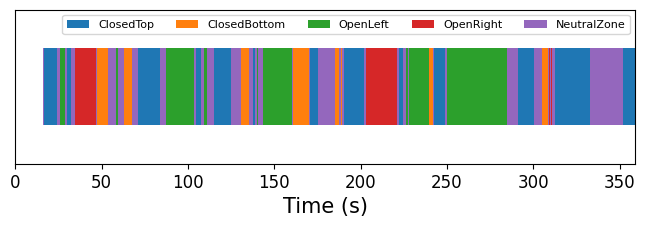

In [126]:
#test plotting interaction graph
tester_interaction_C9_EPM_ADJUST = interaction_C9_EPM_ADJUST[['start','end', 'obj']]
rat.PlotInteraction(tester_interaction_C9_EPM_ADJUST, dict_names_epm, fps = 25)

In [127]:
# OFT WT_PRE
interactions_pre_wt

start     end  obj  diff
0         0   -0.02    0 -0.02
1     -0.02    1.10  2.0  1.12
2       1.1    4.26  4.0  3.16
3      4.26   10.22  1.0  5.96
4     10.22   16.30  5.0  6.08
..      ...     ...  ...   ...
198  597.94  597.96  0.0  0.02
199  597.96  600.80  2.0  2.84
200   600.8  601.00  3.0   0.2
201   601.0  601.02  0.0  0.02
202  601.02  601.58  2.0  0.56

[203 rows x 4 columns]

In [128]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_pre_wt_oft_DIFFERENCE = interactions_pre_wt.copy()
interactions_pre_wt_oft_DIFFERENCE['diff'] = interactions_pre_wt_oft_DIFFERENCE['end'] - interactions_pre_wt_oft_DIFFERENCE['start']
interactions_pre_wt_oft_DIFFERENCE

start     end  obj  diff
0         0   -0.02    0 -0.02
1     -0.02    1.10  2.0  1.12
2       1.1    4.26  4.0  3.16
3      4.26   10.22  1.0  5.96
4     10.22   16.30  5.0  6.08
..      ...     ...  ...   ...
198  597.94  597.96  0.0  0.02
199  597.96  600.80  2.0  2.84
200   600.8  601.00  3.0   0.2
201   601.0  601.02  0.0  0.02
202  601.02  601.58  2.0  0.56

[203 rows x 4 columns]

In [129]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_pre_WT_oft_filter = interactions_pre_wt_oft_DIFFERENCE[interactions_pre_wt_oft_DIFFERENCE['obj'] != 0.0]
interactions_pre_WT_oft_filter

start     end  obj   diff
1     -0.02    1.10  2.0   1.12
2       1.1    4.26  4.0   3.16
3      4.26   10.22  1.0   5.96
4     10.22   16.30  5.0   6.08
5      16.3   29.76  2.0  13.46
..      ...     ...  ...    ...
195  595.88  597.76  5.0   1.88
197  597.82  597.94  5.0   0.12
199  597.96  600.80  2.0   2.84
200   600.8  601.00  3.0    0.2
202  601.02  601.58  2.0   0.56

[157 rows x 4 columns]

In [130]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
interactions_pre_WT_oft_ADJUST = interactions_pre_WT_oft_filter.copy()
interactions_pre_WT_oft_ADJUST = interactions_pre_WT_oft_ADJUST.reset_index(drop=True)
for i in range(1, len(interactions_pre_WT_oft_ADJUST)):
    interactions_pre_WT_oft_ADJUST.loc[i, 'end'] = interactions_pre_WT_oft_ADJUST.loc[i, 'start'] + interactions_pre_WT_oft_ADJUST.loc[i, 'diff']
    interactions_pre_WT_oft_ADJUST.loc[i, 'start'] = interactions_pre_WT_oft_ADJUST.loc[i-1, 'end'] 
interactions_pre_WT_oft_ADJUST
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

start     end  obj   diff
0     -0.02    1.10  2.0   1.12
1       1.1    4.26  4.0   3.16
2      4.26   10.22  1.0   5.96
3     10.22   16.30  5.0   6.08
4      16.3   29.76  2.0  13.46
..      ...     ...  ...    ...
152  595.88  597.76  5.0   1.88
153  597.76  597.94  5.0   0.12
154  597.94  600.80  2.0   2.84
155   600.8  601.00  3.0    0.2
156   601.0  601.58  2.0   0.56

[157 rows x 4 columns]

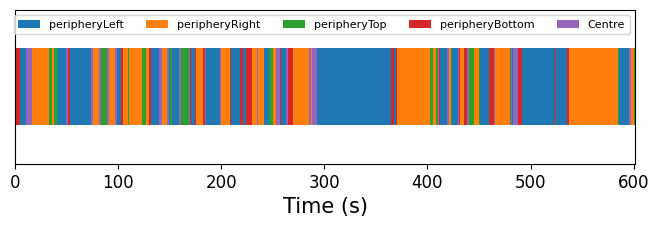

In [131]:
#test plotting interaction graph
interactions_pre_WT_oft_ADJUST = interactions_pre_WT_oft_ADJUST[['start','end', 'obj']]
rat.PlotInteraction(interactions_pre_WT_oft_ADJUST, dict_names, fps = 50)

In [132]:
# OFT C9_PRE
interactions_pre_C9

start     end  obj
0         0   -0.02    0
1     -0.02    5.94  2.0
2      5.94    7.08  4.0
3      7.08   14.06  1.0
4     14.06   16.68  4.0
..      ...     ...  ...
134  341.26  343.72  4.0
135  343.72  345.22  5.0
136  345.22  345.82  3.0
137  345.82  360.38  1.0
138  360.38  361.90  5.0

[139 rows x 3 columns]

In [133]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_pre_C9_oft_DIFFERENCE = interactions_pre_C9.copy()
interactions_pre_C9_oft_DIFFERENCE['diff'] = interactions_pre_C9_oft_DIFFERENCE['end'] - interactions_pre_C9_oft_DIFFERENCE['start']
interactions_pre_C9_oft_DIFFERENCE

start     end  obj   diff
0         0   -0.02    0  -0.02
1     -0.02    5.94  2.0   5.96
2      5.94    7.08  4.0   1.14
3      7.08   14.06  1.0   6.98
4     14.06   16.68  4.0   2.62
..      ...     ...  ...    ...
134  341.26  343.72  4.0   2.46
135  343.72  345.22  5.0    1.5
136  345.22  345.82  3.0    0.6
137  345.82  360.38  1.0  14.56
138  360.38  361.90  5.0   1.52

[139 rows x 4 columns]

In [134]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_pre_C9_oft_filter = interactions_pre_C9_oft_DIFFERENCE[interactions_pre_C9_oft_DIFFERENCE['obj'] != 0.0]
interactions_pre_C9_oft_filter

start     end  obj   diff
1     -0.02    5.94  2.0   5.96
2      5.94    7.08  4.0   1.14
3      7.08   14.06  1.0   6.98
4     14.06   16.68  4.0   2.62
5     16.68   17.24  5.0   0.56
..      ...     ...  ...    ...
134  341.26  343.72  4.0   2.46
135  343.72  345.22  5.0    1.5
136  345.22  345.82  3.0    0.6
137  345.82  360.38  1.0  14.56
138  360.38  361.90  5.0   1.52

[117 rows x 4 columns]

In [135]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
interactions_pre_C9_oft_ADJUST = interactions_pre_C9_oft_filter.copy()
interactions_pre_C9_oft_ADJUST = interactions_pre_C9_oft_ADJUST.reset_index(drop=True)
for i in range(1, len(interactions_pre_C9_oft_ADJUST)):
    interactions_pre_C9_oft_ADJUST.loc[i, 'end'] = interactions_pre_C9_oft_ADJUST.loc[i, 'start'] + interactions_pre_C9_oft_ADJUST.loc[i, 'diff']
    interactions_pre_C9_oft_ADJUST.loc[i, 'start'] = interactions_pre_C9_oft_ADJUST.loc[i-1, 'end'] 
interactions_pre_C9_oft_ADJUST
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

start     end  obj   diff
0     -0.02    5.94  2.0   5.96
1      5.94    7.08  4.0   1.14
2      7.08   14.06  1.0   6.98
3     14.06   16.68  4.0   2.62
4     16.68   17.24  5.0   0.56
..      ...     ...  ...    ...
112  341.26  343.72  4.0   2.46
113  343.72  345.22  5.0    1.5
114  345.22  345.82  3.0    0.6
115  345.82  360.38  1.0  14.56
116  360.38  361.90  5.0   1.52

[117 rows x 4 columns]

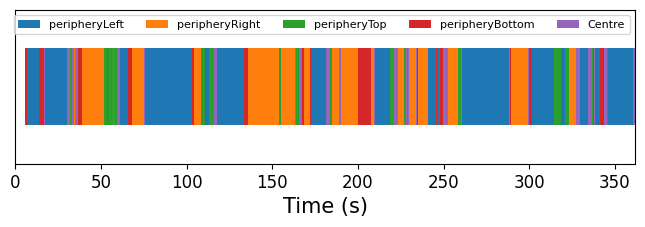

In [136]:
#test plotting interaction graph
interactions_pre_C9_oft_ADJUST = interactions_pre_C9_oft_ADJUST[['start','end', 'obj']]
rat.PlotInteraction(interactions_pre_C9_oft_ADJUST, dict_names, fps = 50)

In [137]:
# OFT WT_POST
interactions_post_wt

start     end  obj
0         0   -0.04    0
1     -0.04    2.64  1.0
2      2.64    4.28  4.0
3      4.28   11.68  2.0
4     11.68   13.48  3.0
..      ...     ...  ...
129  589.36  589.64  3.0
130  589.64  594.84  5.0
131  594.84  594.88  0.0
132  594.88  599.60  1.0
133   599.6  601.72  4.0

[134 rows x 3 columns]

In [138]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_post_WT_oft_DIFFERENCE = interactions_post_wt.copy()
interactions_post_WT_oft_DIFFERENCE['diff'] = interactions_post_WT_oft_DIFFERENCE['end'] - interactions_post_WT_oft_DIFFERENCE['start']
interactions_post_WT_oft_DIFFERENCE

start     end  obj  diff
0         0   -0.04    0 -0.04
1     -0.04    2.64  1.0  2.68
2      2.64    4.28  4.0  1.64
3      4.28   11.68  2.0   7.4
4     11.68   13.48  3.0   1.8
..      ...     ...  ...   ...
129  589.36  589.64  3.0  0.28
130  589.64  594.84  5.0   5.2
131  594.84  594.88  0.0  0.04
132  594.88  599.60  1.0  4.72
133   599.6  601.72  4.0  2.12

[134 rows x 4 columns]

In [139]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_post_WT_oft_filter = interactions_post_WT_oft_DIFFERENCE[interactions_post_WT_oft_DIFFERENCE['obj'] != 0.0]
interactions_post_WT_oft_filter

start     end  obj  diff
1     -0.04    2.64  1.0  2.68
2      2.64    4.28  4.0  1.64
3      4.28   11.68  2.0   7.4
4     11.68   13.48  3.0   1.8
5     13.48   19.84  1.0  6.36
..      ...     ...  ...   ...
128  589.28  589.36  5.0  0.08
129  589.36  589.64  3.0  0.28
130  589.64  594.84  5.0   5.2
132  594.88  599.60  1.0  4.72
133   599.6  601.72  4.0  2.12

[117 rows x 4 columns]

In [140]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
interactions_post_WT_oft_ADJUST = interactions_post_WT_oft_filter.copy()
interactions_post_WT_oft_ADJUST  = interactions_post_WT_oft_ADJUST.reset_index(drop=True)
for i in range(1, len(interactions_post_WT_oft_ADJUST )):
    interactions_post_WT_oft_ADJUST .loc[i, 'end'] = interactions_post_WT_oft_ADJUST .loc[i, 'start'] + interactions_post_WT_oft_ADJUST .loc[i, 'diff']
    interactions_post_WT_oft_ADJUST .loc[i, 'start'] = interactions_post_WT_oft_ADJUST .loc[i-1, 'end'] 
interactions_post_WT_oft_ADJUST 
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

start     end  obj  diff
0     -0.04    2.64  1.0  2.68
1      2.64    4.28  4.0  1.64
2      4.28   11.68  2.0   7.4
3     11.68   13.48  3.0   1.8
4     13.48   19.84  1.0  6.36
..      ...     ...  ...   ...
112  589.28  589.36  5.0  0.08
113  589.36  589.64  3.0  0.28
114  589.64  594.84  5.0   5.2
115  594.84  599.60  1.0  4.72
116   599.6  601.72  4.0  2.12

[117 rows x 4 columns]

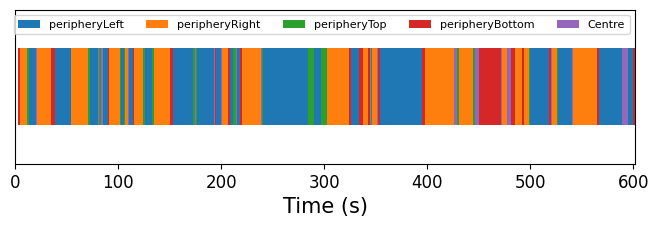

In [141]:
#test plotting interaction graph
interactions_post_WT_oft_ADJUST  = interactions_post_WT_oft_ADJUST [['start','end', 'obj']]
rat.PlotInteraction(interactions_post_WT_oft_ADJUST , dict_names, fps = 25)

In [142]:
# OFT C9_POST
interactions_post_C9

start     end  obj
0         0   -0.04    0
1     -0.04    0.72  2.0
2      0.72    0.76  3.0
3      0.76    1.72  5.0
4      1.72   15.04  1.0
..      ...     ...  ...
157   344.6  344.64  0.0
158  344.64  345.08  3.0
159  345.08  347.44  5.0
160  347.44  349.12  4.0
161  349.12  360.88  1.0

[162 rows x 3 columns]

In [143]:
#Create copy of intercations data and add difference column
#Calculate seconds of mouse in each zone
interactions_post_C9_oft_DIFFERENCE = interactions_post_C9.copy()
interactions_post_C9_oft_DIFFERENCE['diff'] = interactions_post_C9_oft_DIFFERENCE['end'] - interactions_post_C9_oft_DIFFERENCE['start']
interactions_post_C9_oft_DIFFERENCE

start     end  obj   diff
0         0   -0.04    0  -0.04
1     -0.04    0.72  2.0   0.76
2      0.72    0.76  3.0   0.04
3      0.76    1.72  5.0   0.96
4      1.72   15.04  1.0  13.32
..      ...     ...  ...    ...
157   344.6  344.64  0.0   0.04
158  344.64  345.08  3.0   0.44
159  345.08  347.44  5.0   2.36
160  347.44  349.12  4.0   1.68
161  349.12  360.88  1.0  11.76

[162 rows x 4 columns]

In [144]:
#Boolean condition to Remove rows where the value in the 'obj' column is equal to '0.0'
interactions_post_C9_oft_filter = interactions_post_C9_oft_DIFFERENCE[interactions_post_C9_oft_DIFFERENCE['obj'] != 0.0]
interactions_post_C9_oft_filter

start     end  obj   diff
1     -0.04    0.72  2.0   0.76
2      0.72    0.76  3.0   0.04
3      0.76    1.72  5.0   0.96
4      1.72   15.04  1.0  13.32
5     15.04   15.64  4.0    0.6
..      ...     ...  ...    ...
156  337.28  344.60  2.0   7.32
158  344.64  345.08  3.0   0.44
159  345.08  347.44  5.0   2.36
160  347.44  349.12  4.0   1.68
161  349.12  360.88  1.0  11.76

[122 rows x 4 columns]

In [145]:
#make start and end values match up
# Calculate the increased value of the 'start' value in each row
interactions_post_C9_oft_ADJUST = interactions_post_C9_oft_filter.copy()
interactions_post_C9_oft_ADJUST  = interactions_post_C9_oft_ADJUST.reset_index(drop=True)
for i in range(1, len(interactions_post_WT_oft_ADJUST )):
    interactions_post_C9_oft_ADJUST.loc[i, 'end'] = interactions_post_C9_oft_ADJUST.loc[i, 'start'] + interactions_post_C9_oft_ADJUST.loc[i, 'diff']
    interactions_post_C9_oft_ADJUST.loc[i, 'start'] = interactions_post_C9_oft_ADJUST.loc[i-1, 'end'] 
interactions_post_C9_oft_ADJUST
interactions_post_C9_oft_ADJUST.to_csv('InteractionsPlot_post_C9_oft', index=False)
### THIS IS WHAT YOU USE FOR INTERACTION PLOT, JUST .drop('diff', axis=1) ###
#tester_interactions_post_wt_epm[['start','end', 'obj']]

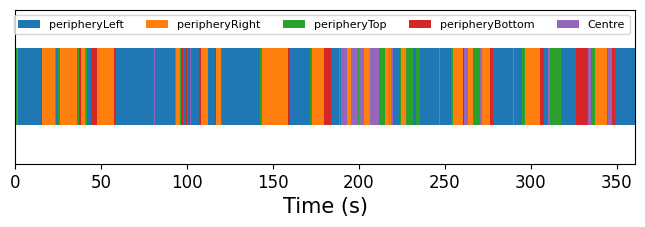

In [146]:
#test plotting interaction graph
interactions_post_C9_oft_ADJUST  = interactions_post_C9_oft_ADJUST [['start','end', 'obj']]
rat.PlotInteraction(interactions_post_C9_oft_ADJUST , dict_names, fps = 25)